In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 실행후 런타임 다시시작및 모두실행도 꼭해주기!

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 그래프 크기 고정
plt.rcParams["figure.figsize"] = (12, 9)

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

# Seaborn개요
  - matplotlib보다 많이쓰는 이유는 **통계기반 plot**을 손쉽게 그릴 수 있기 때문!
  - matplotlib은 넘파이 배열 사용했기 때문에 시각화하려면 grouby또는 pivot_table을 만들어서 시각화해야한다.
  - 카테고리별 분류를 하기 위해선 plot을 각각 그려야 한다.

  그래서 통계기반 시각화 보고싶으면 seaborn이 훨 간편할 때가 많다.

## seaborn에서만 제공되는 통계기반 plot

In [ ]:
tips = sns.load_dataset("tips")  # seaborn에서 제공하는 기본 데이터셋
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


tips : 식당 데이터셋
- total_bill : 지불금액
- tip : 팁
- size : 몇명이서왔니

In [ ]:
# 요일별 식사한 개수
df_by_day_count = tips.groupby("day")["total_bill"].count()
df_by_day_count

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: total_bill, dtype: int64

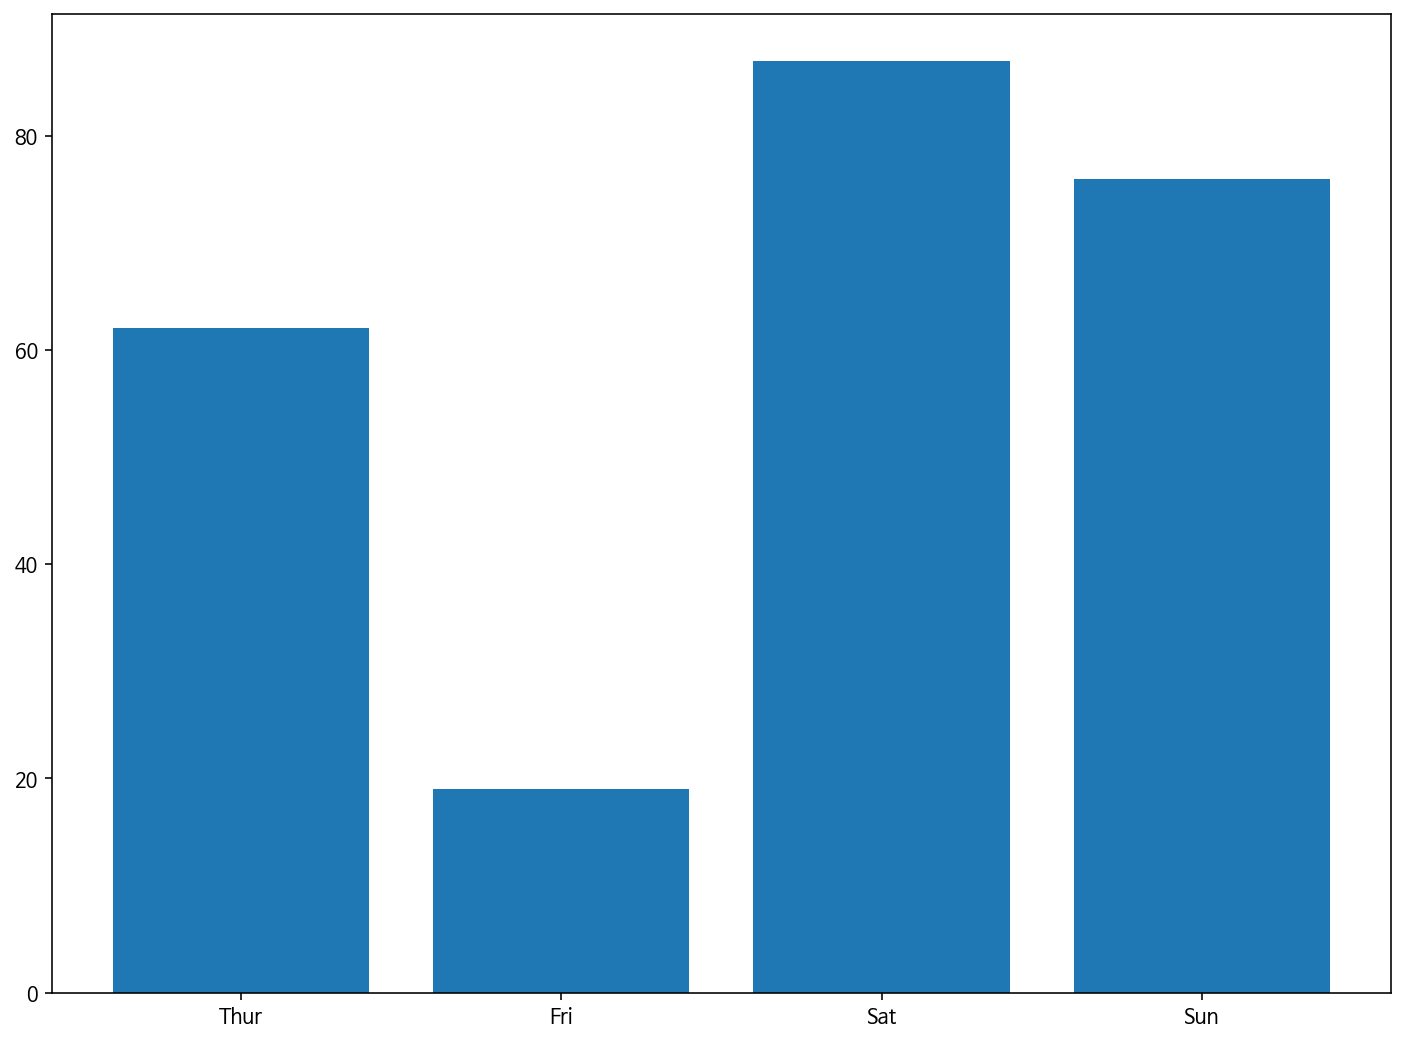

In [ ]:
plt.bar(df_by_day_count.index, df_by_day_count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


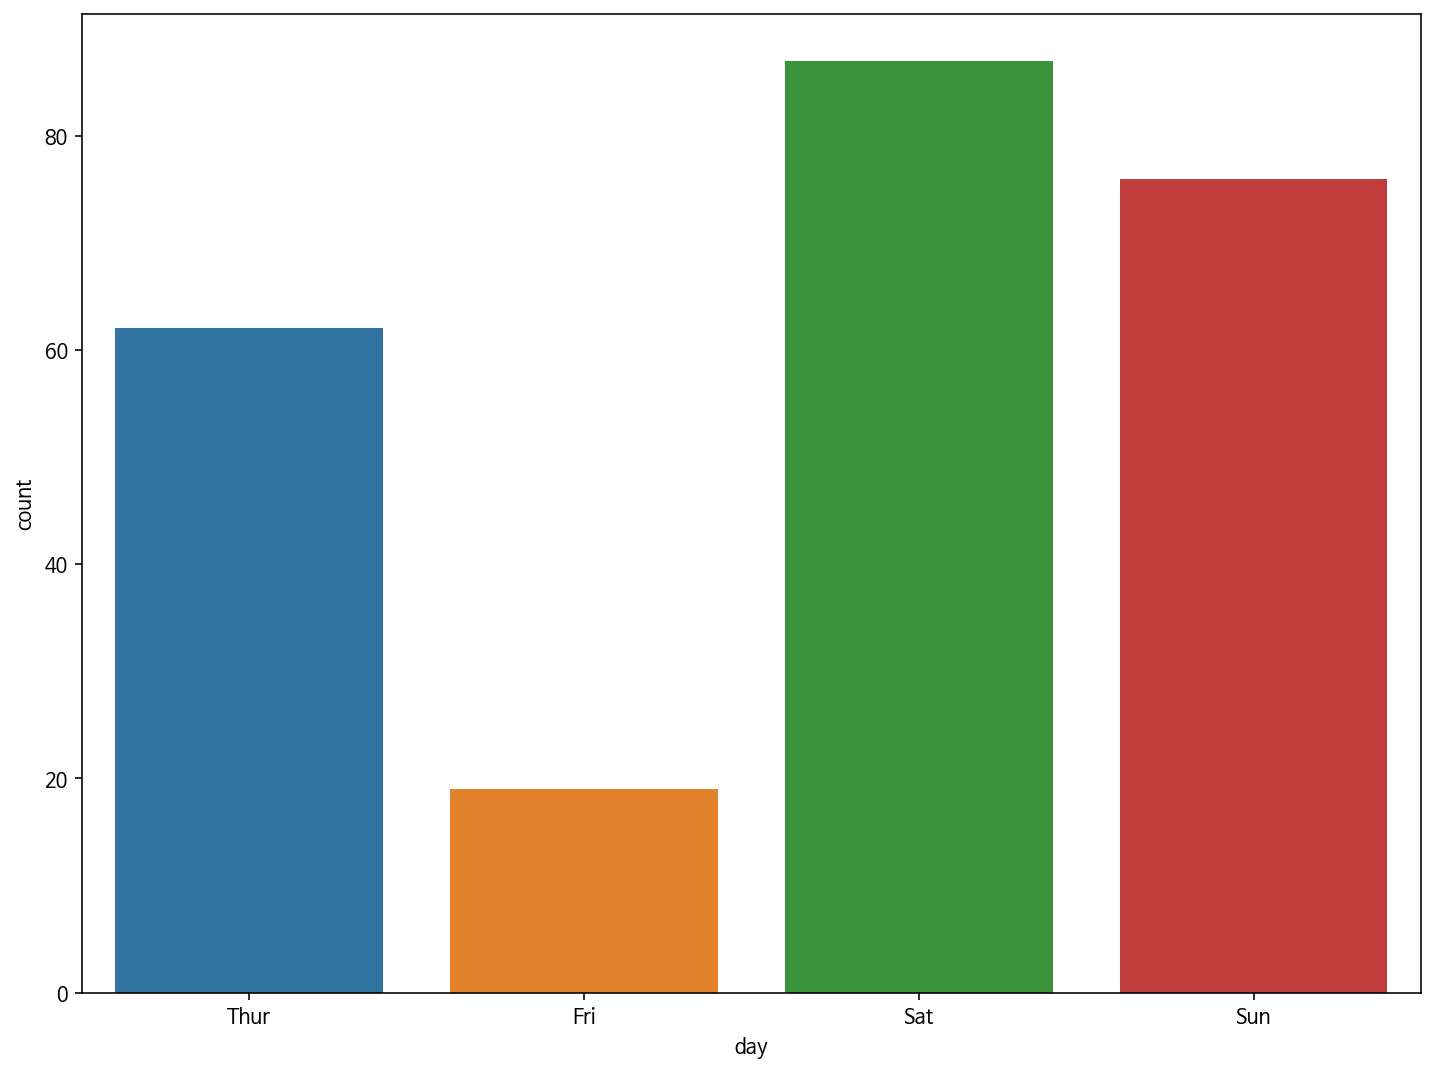

In [ ]:
# seaborn을 활용하면? 집계된 결과를 '시각화'만 할거면
sns.countplot(tips['day'])
plt.show()

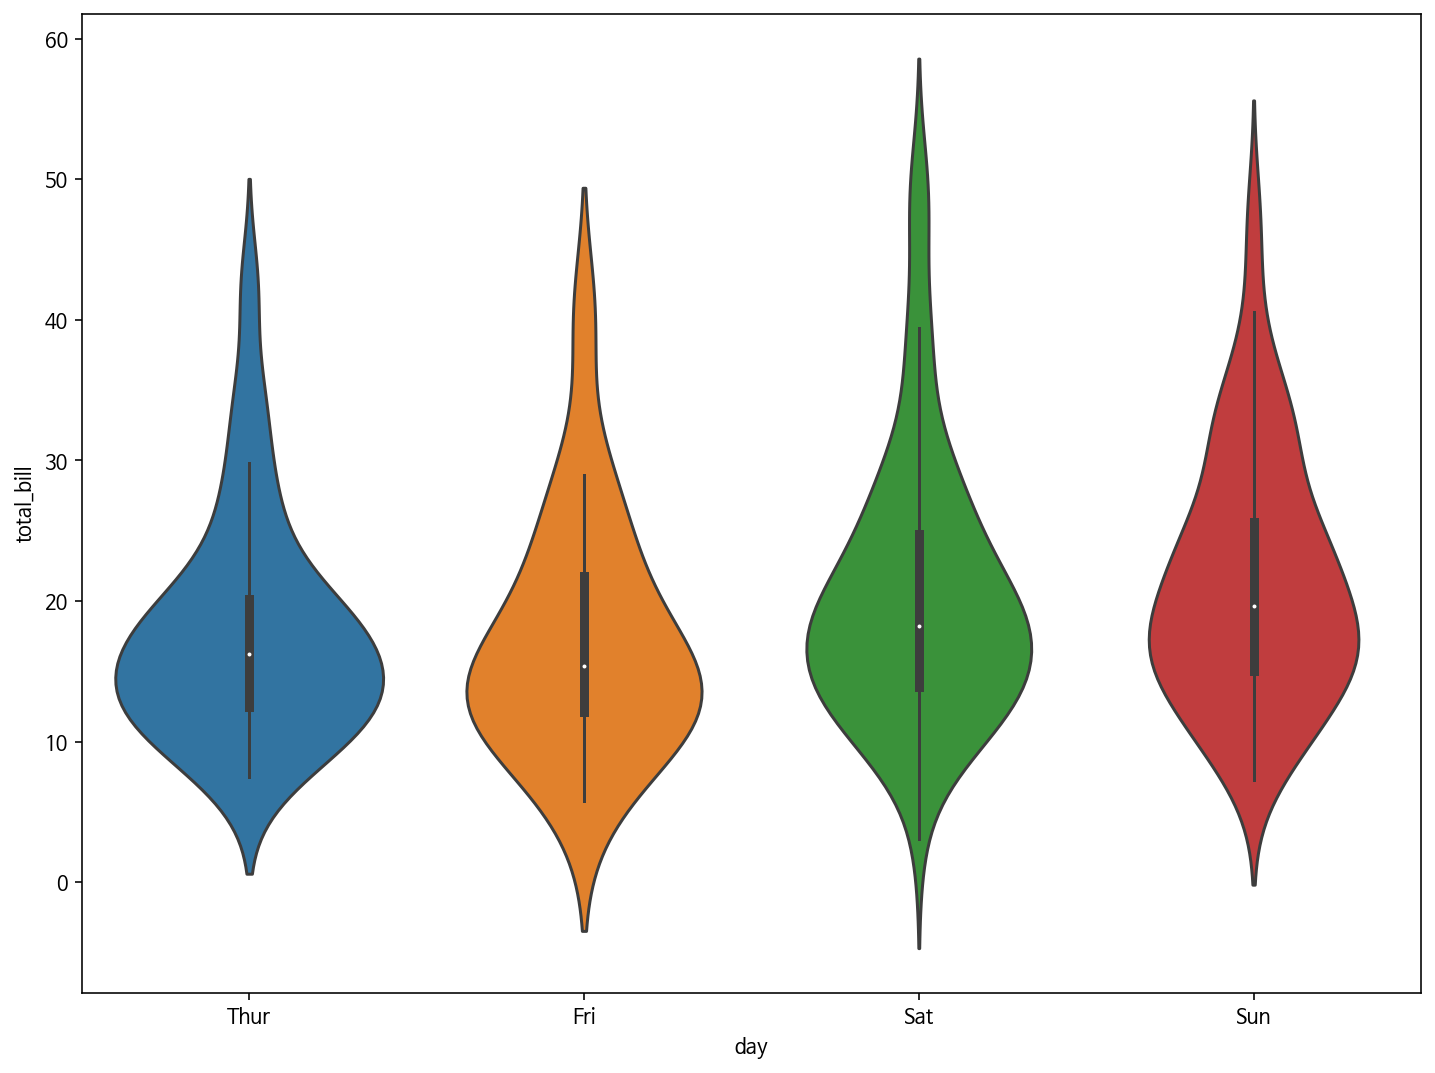

In [ ]:
sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

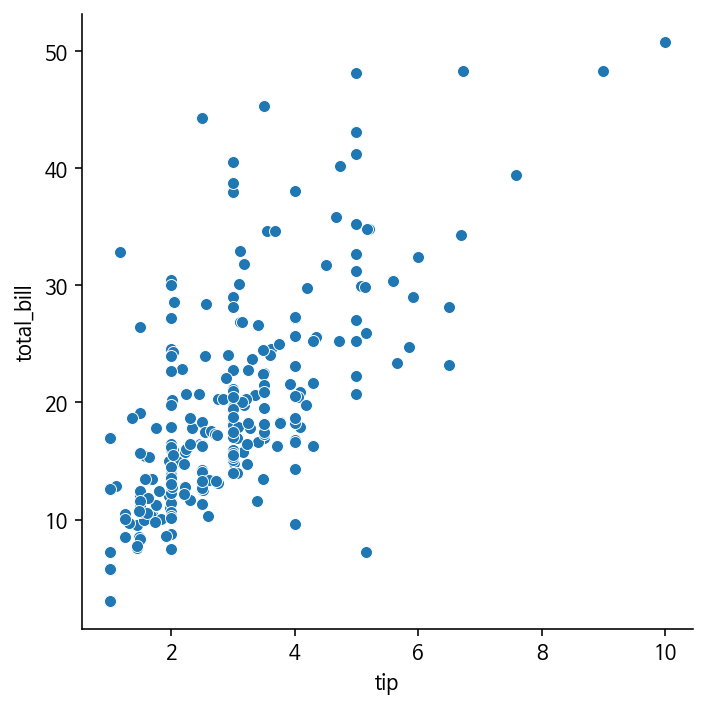

In [ ]:
sns.relplot(x="tip", y="total_bill", data=tips)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


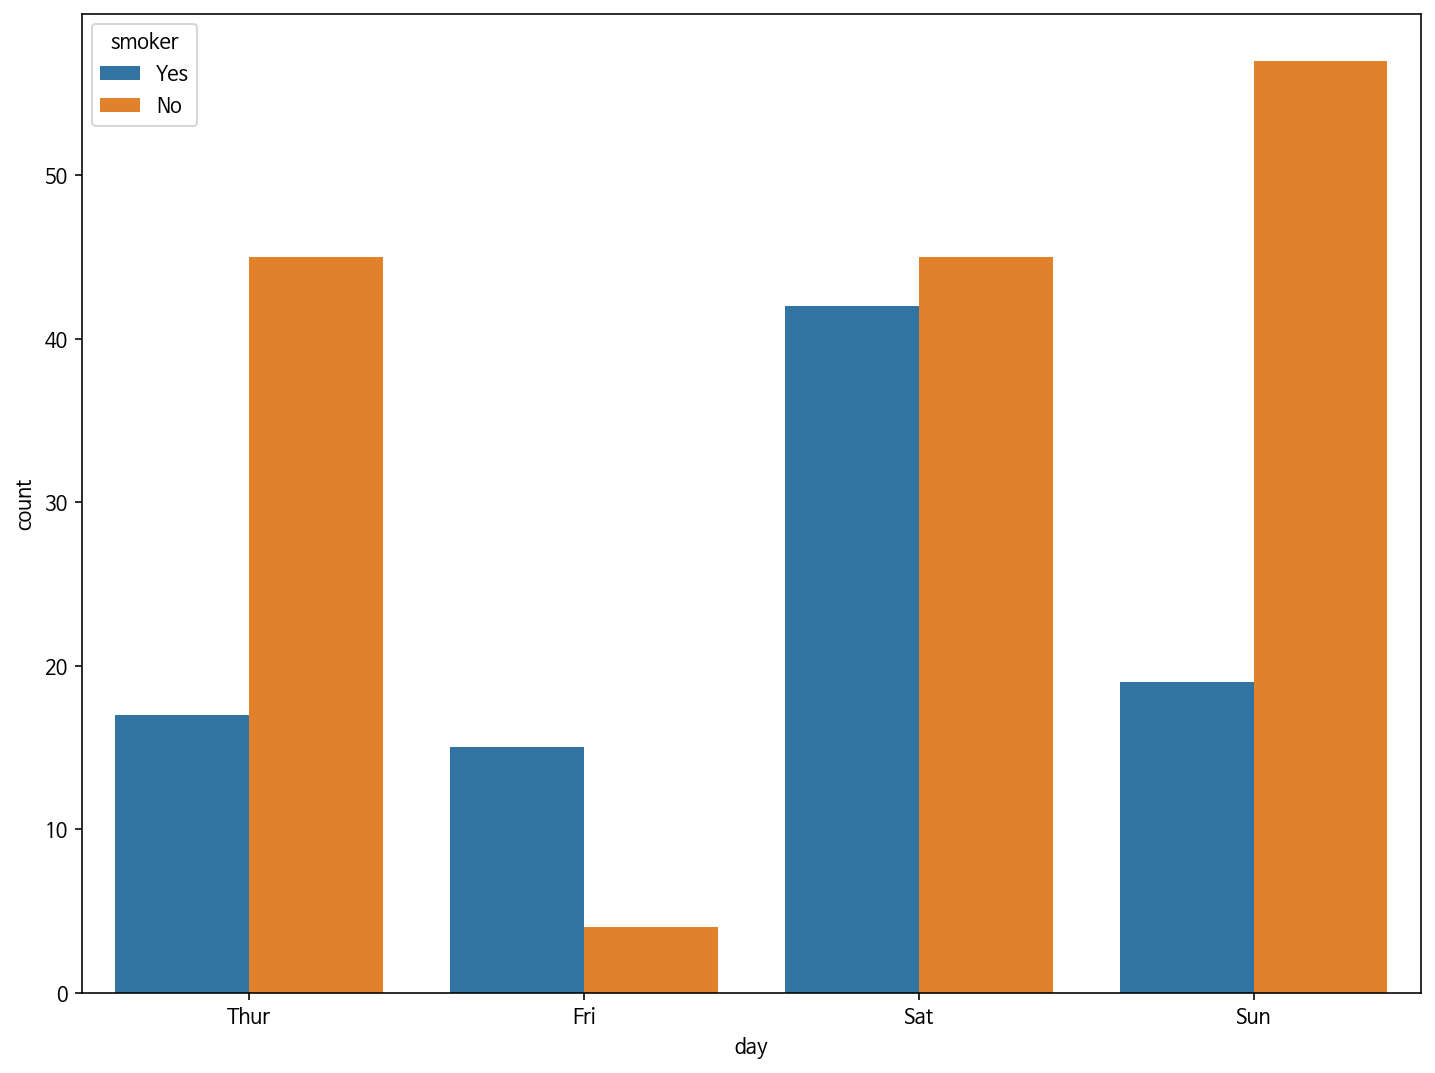

In [ ]:
#  비교그래프 saaborn으로 개쉽게 그릴수 있음 hue⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐
sns.countplot(tips['day'], data=tips, hue='smoker')  # hue: 비교 대상 컬럼 지정⭐⭐⭐⭐⭐
plt.show()

## 다양하고 아름다운 스타일링

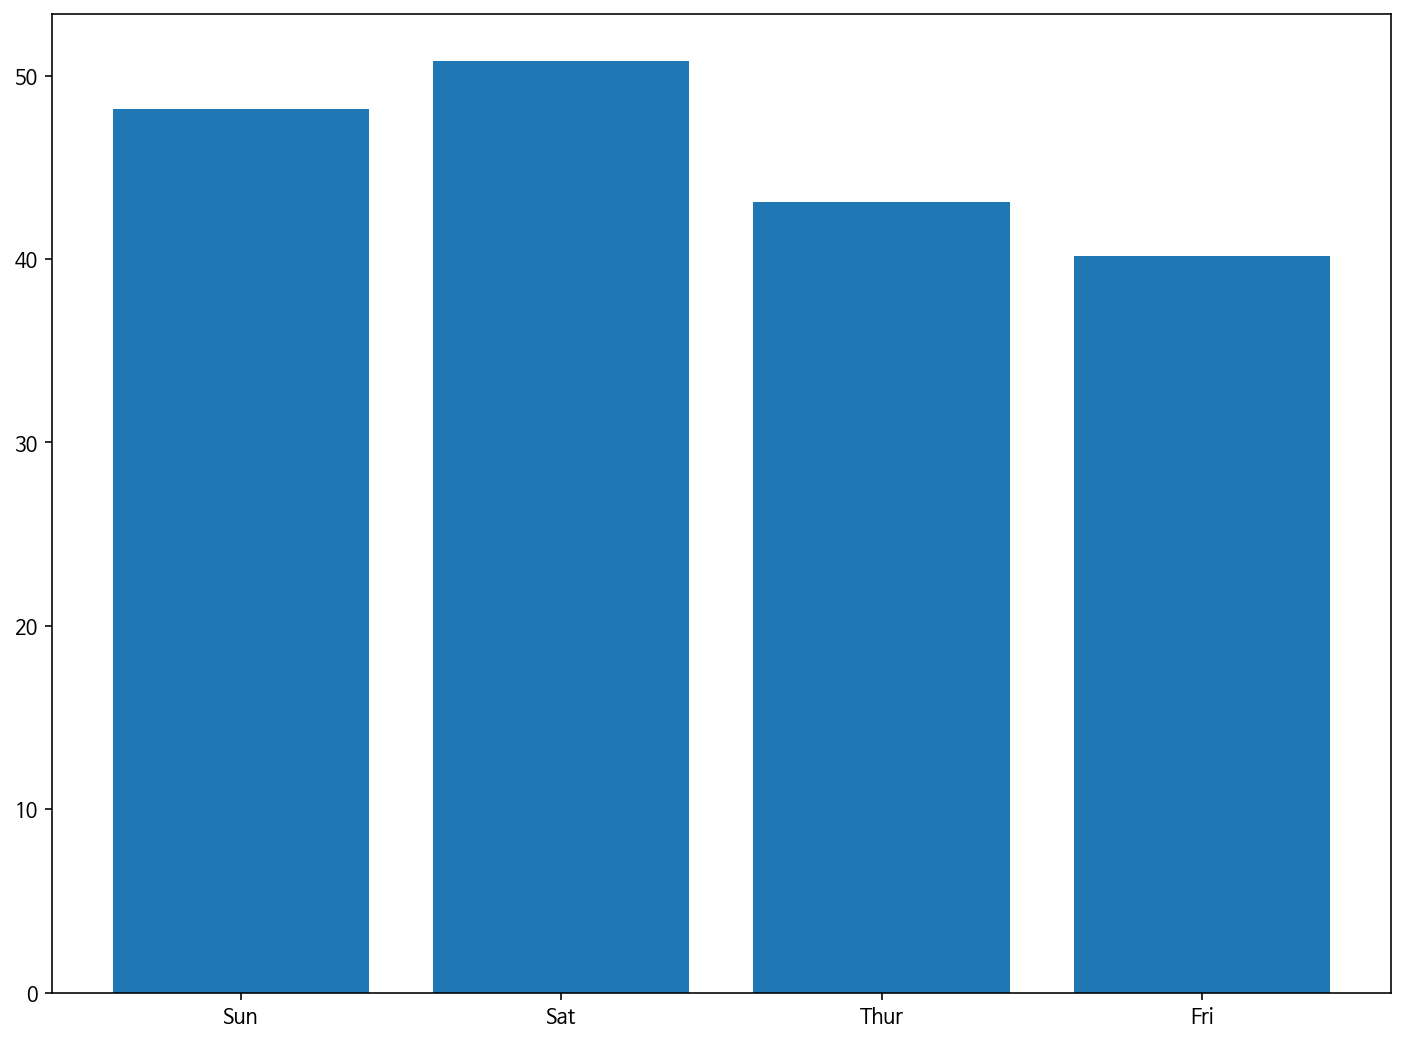

In [ ]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


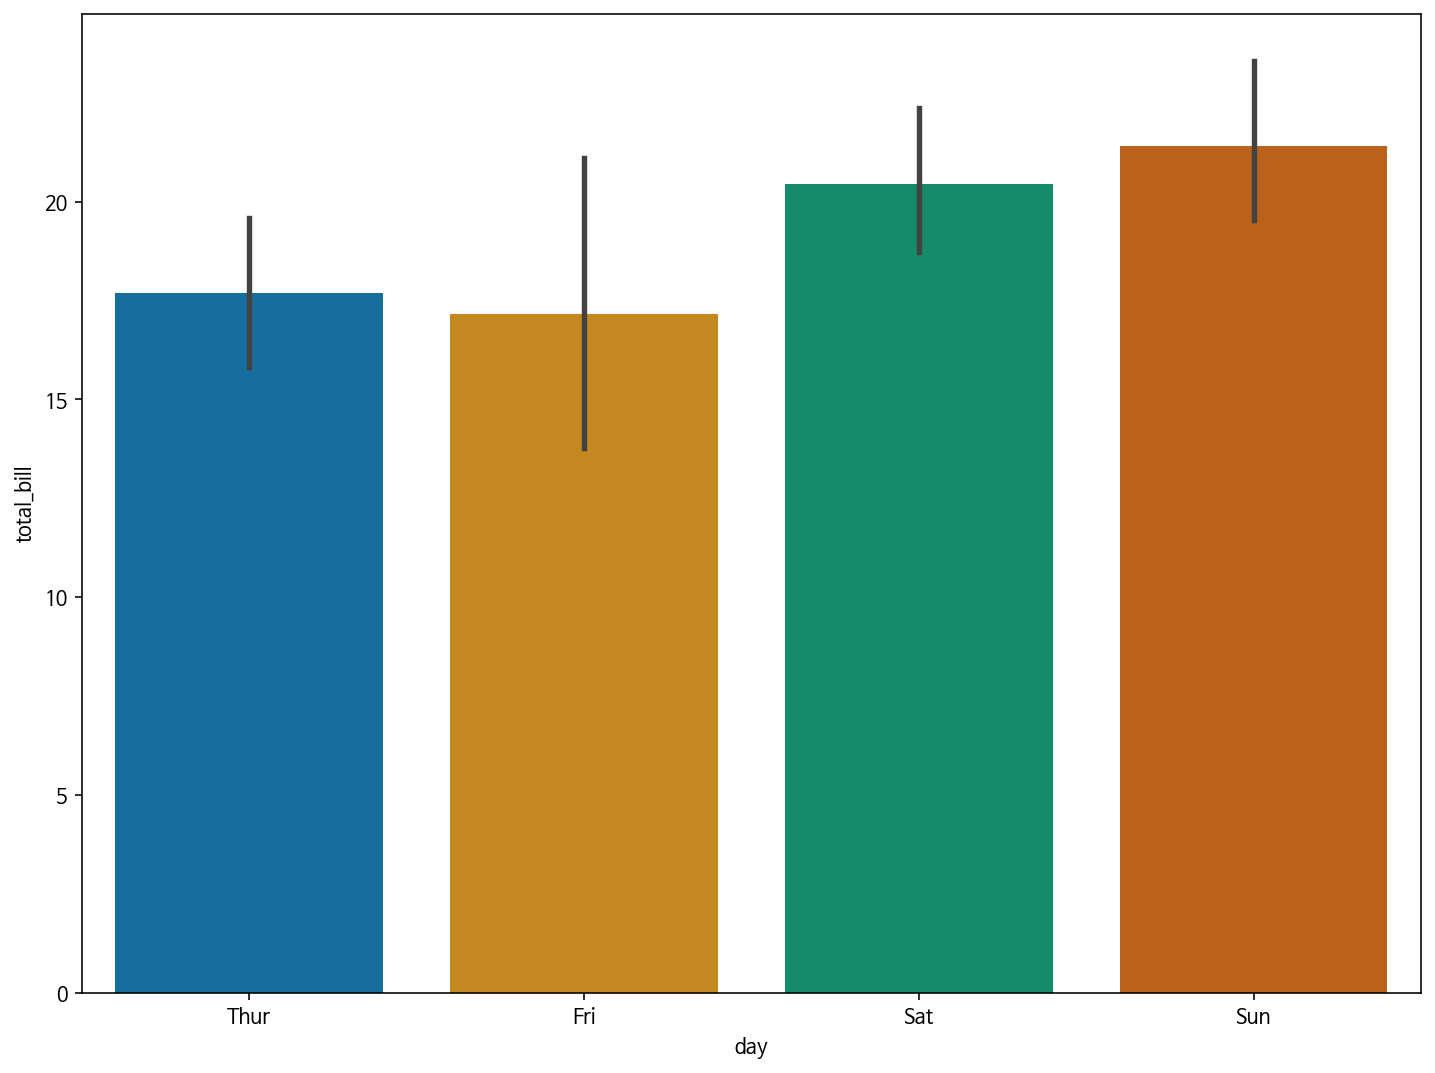

In [ ]:
sns.barplot(tips['day'], tips['total_bill'], data=tips, palette='colorblind')
plt.show()

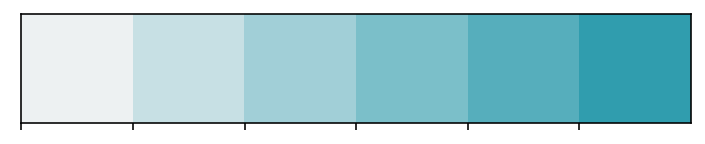

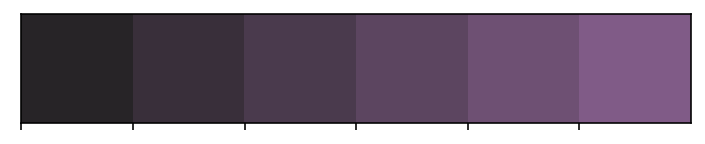

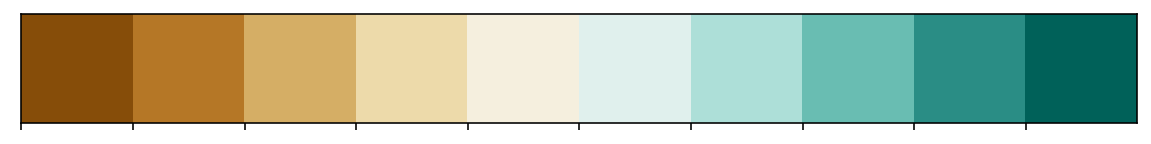

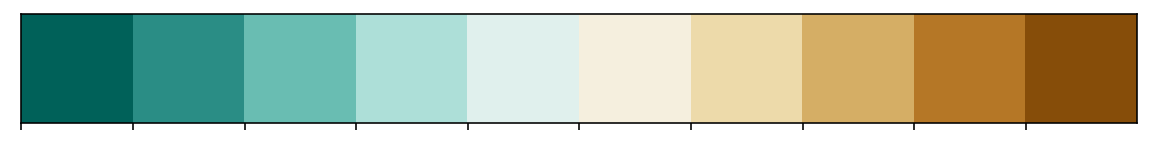

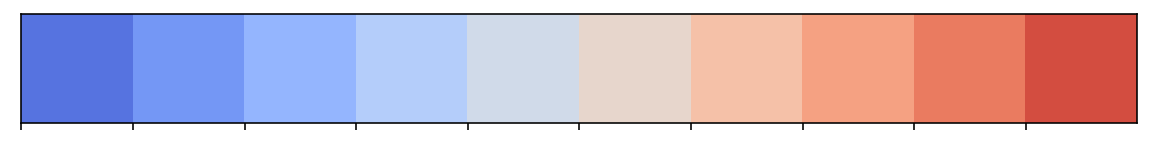

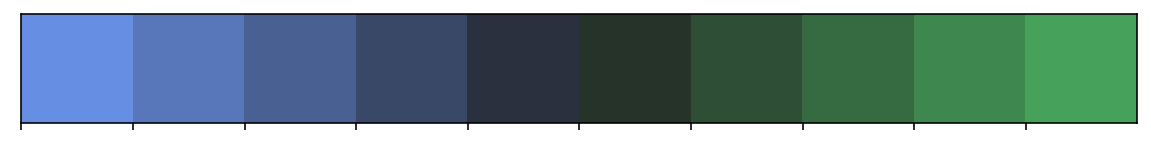

In [ ]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

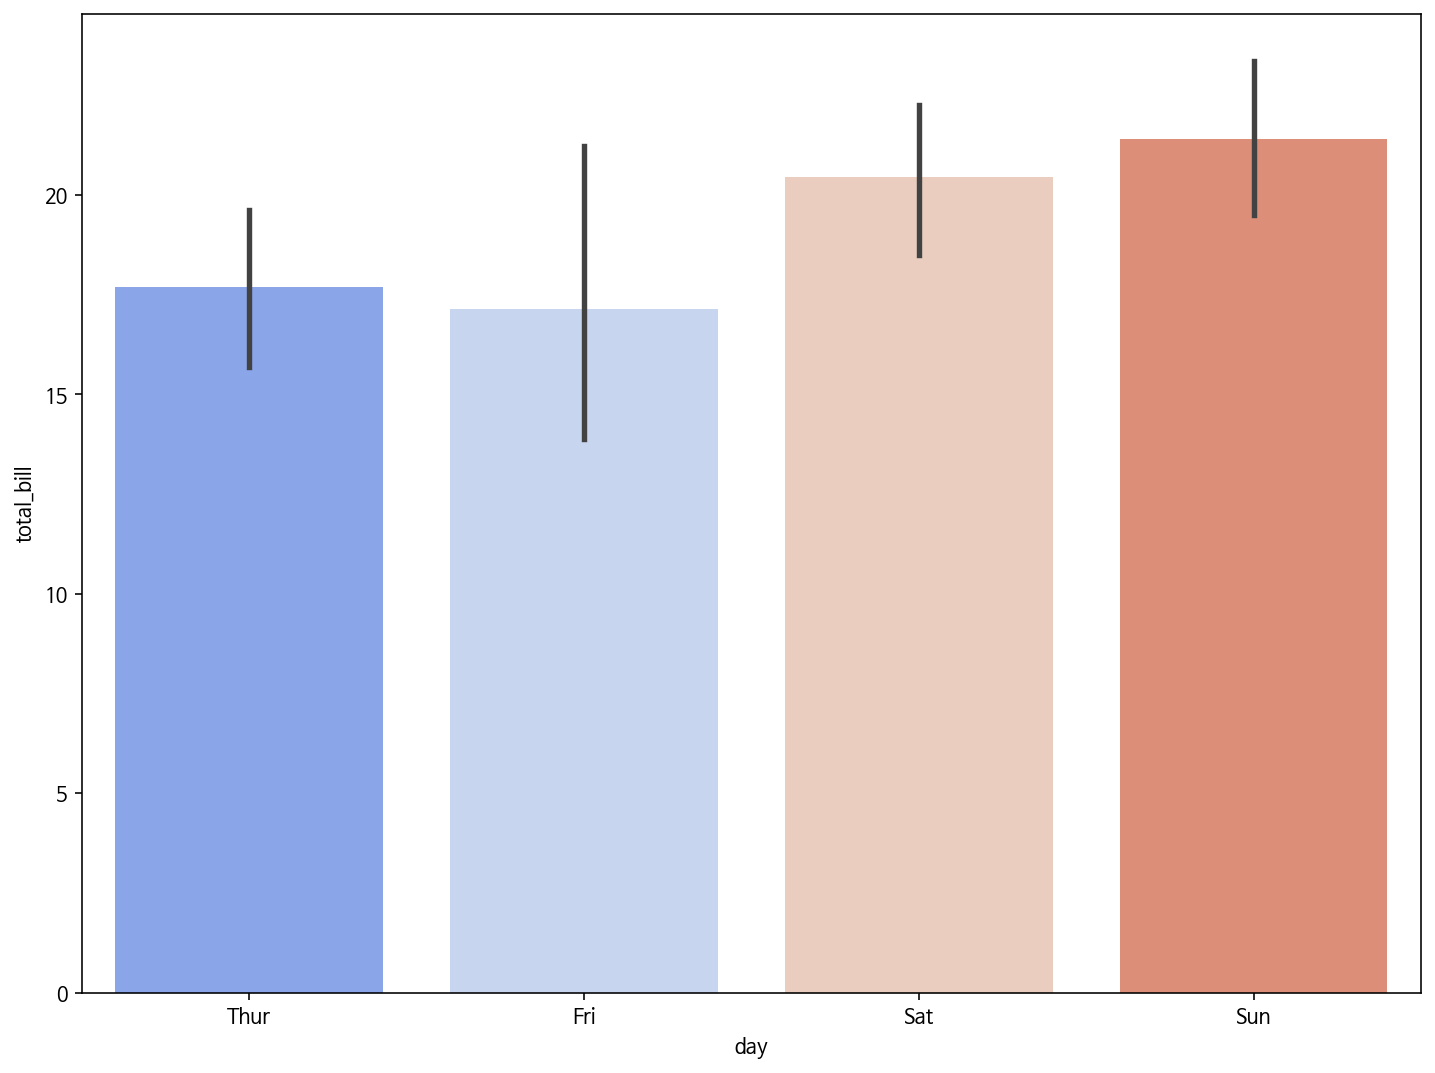

In [ ]:
sns.barplot(x='day', y='total_bill', data=tips, palette='coolwarm')
plt.show()

실습용 데이터 세트 준비
  - titanic : 타이타닉 사망자/생존자 데이터세트
  - tips : 식당 데이터세트

  **타이타닉 데이터셋 설명**
* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 + 배우자 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

In [ ]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 1. countplot
- 항목별 개수 세어주는 시각화 방법

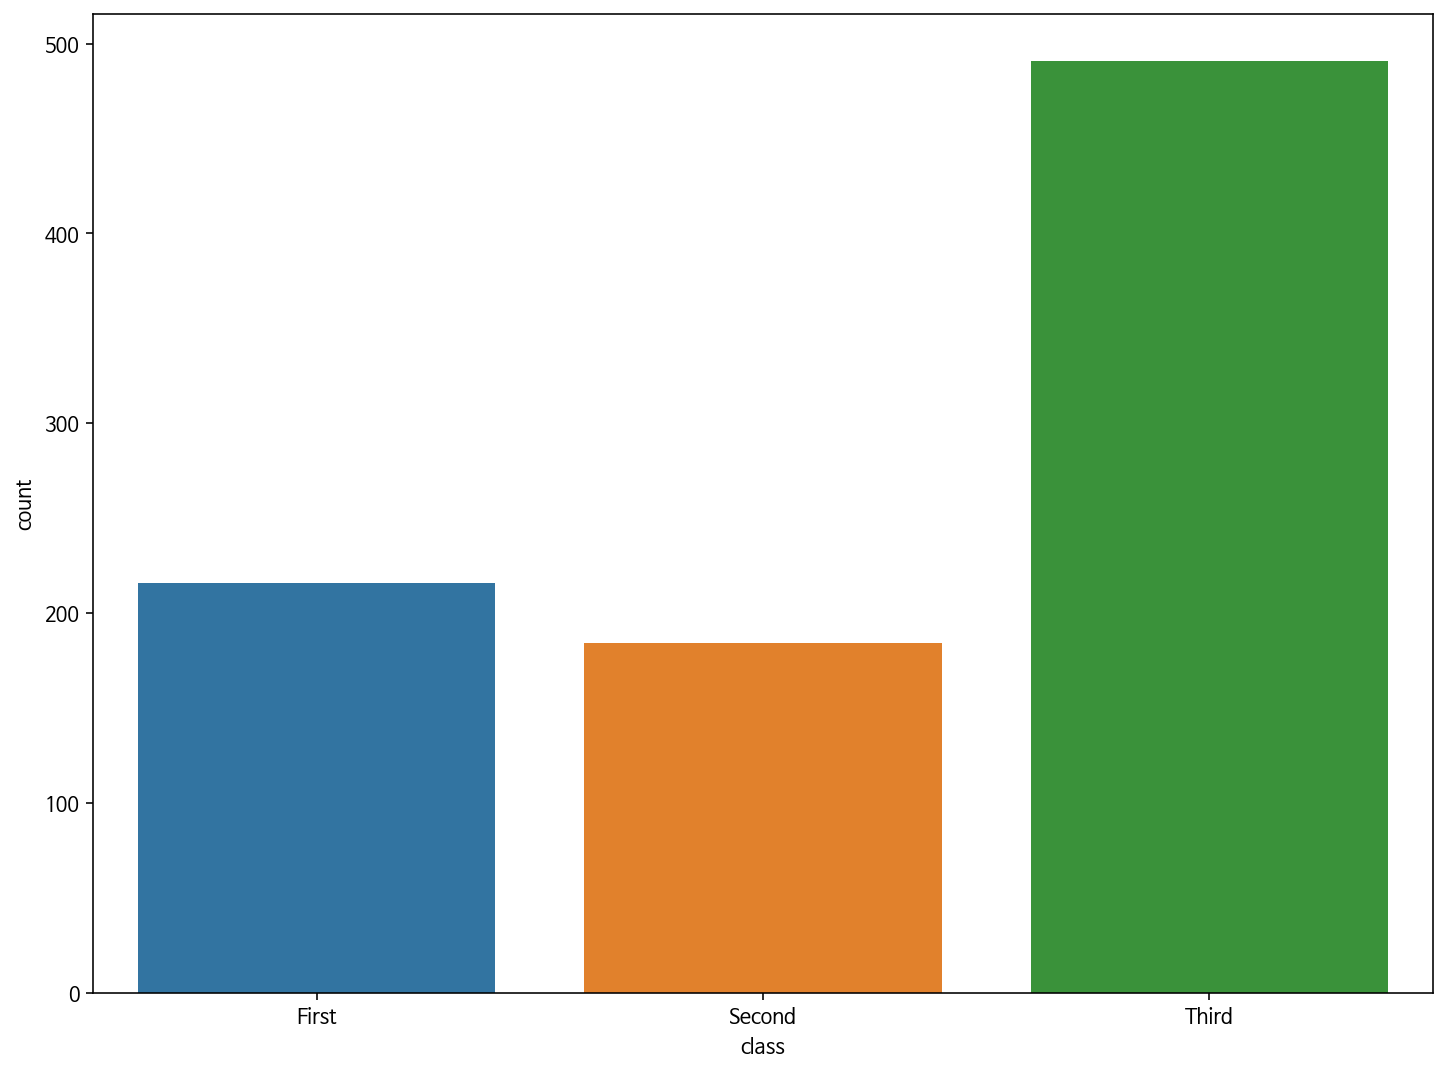

In [ ]:
# 타이타닉데이터에서 class(좌석 등급)마다의 개수를 시각화
sns.countplot(x="class", data=titanic)
plt.show()

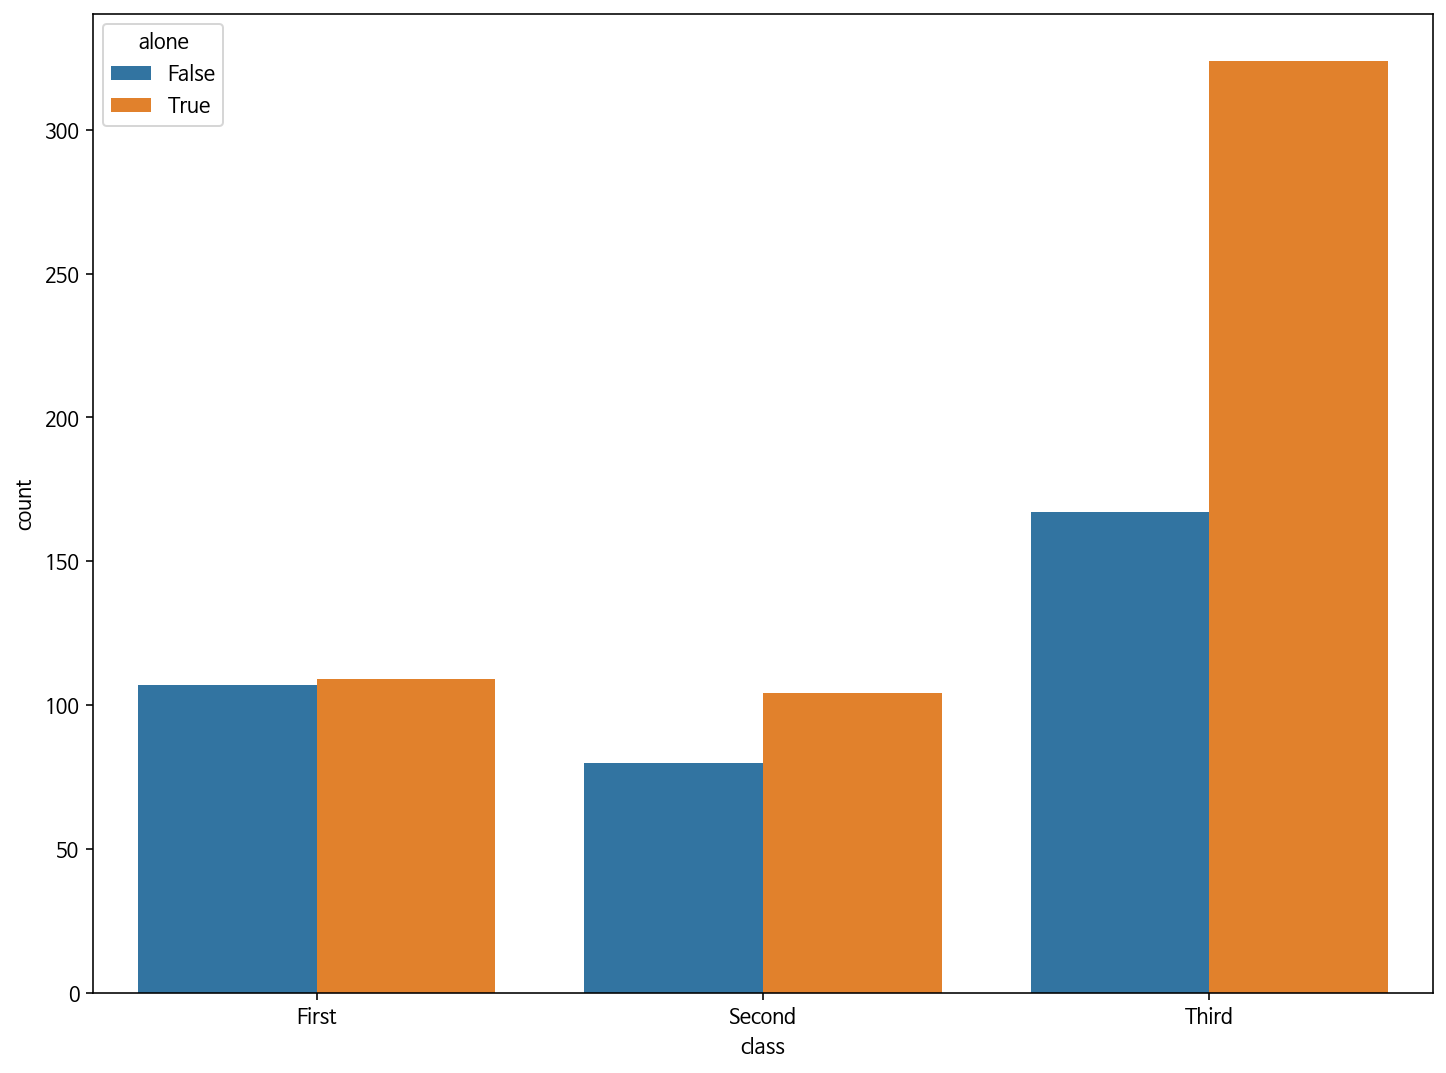

In [ ]:
# 혼자 탑승 했는지 여부에 따른 좌석 등급별 개수
sns.countplot(x="class", data=titanic, hue="alone")
plt.show()

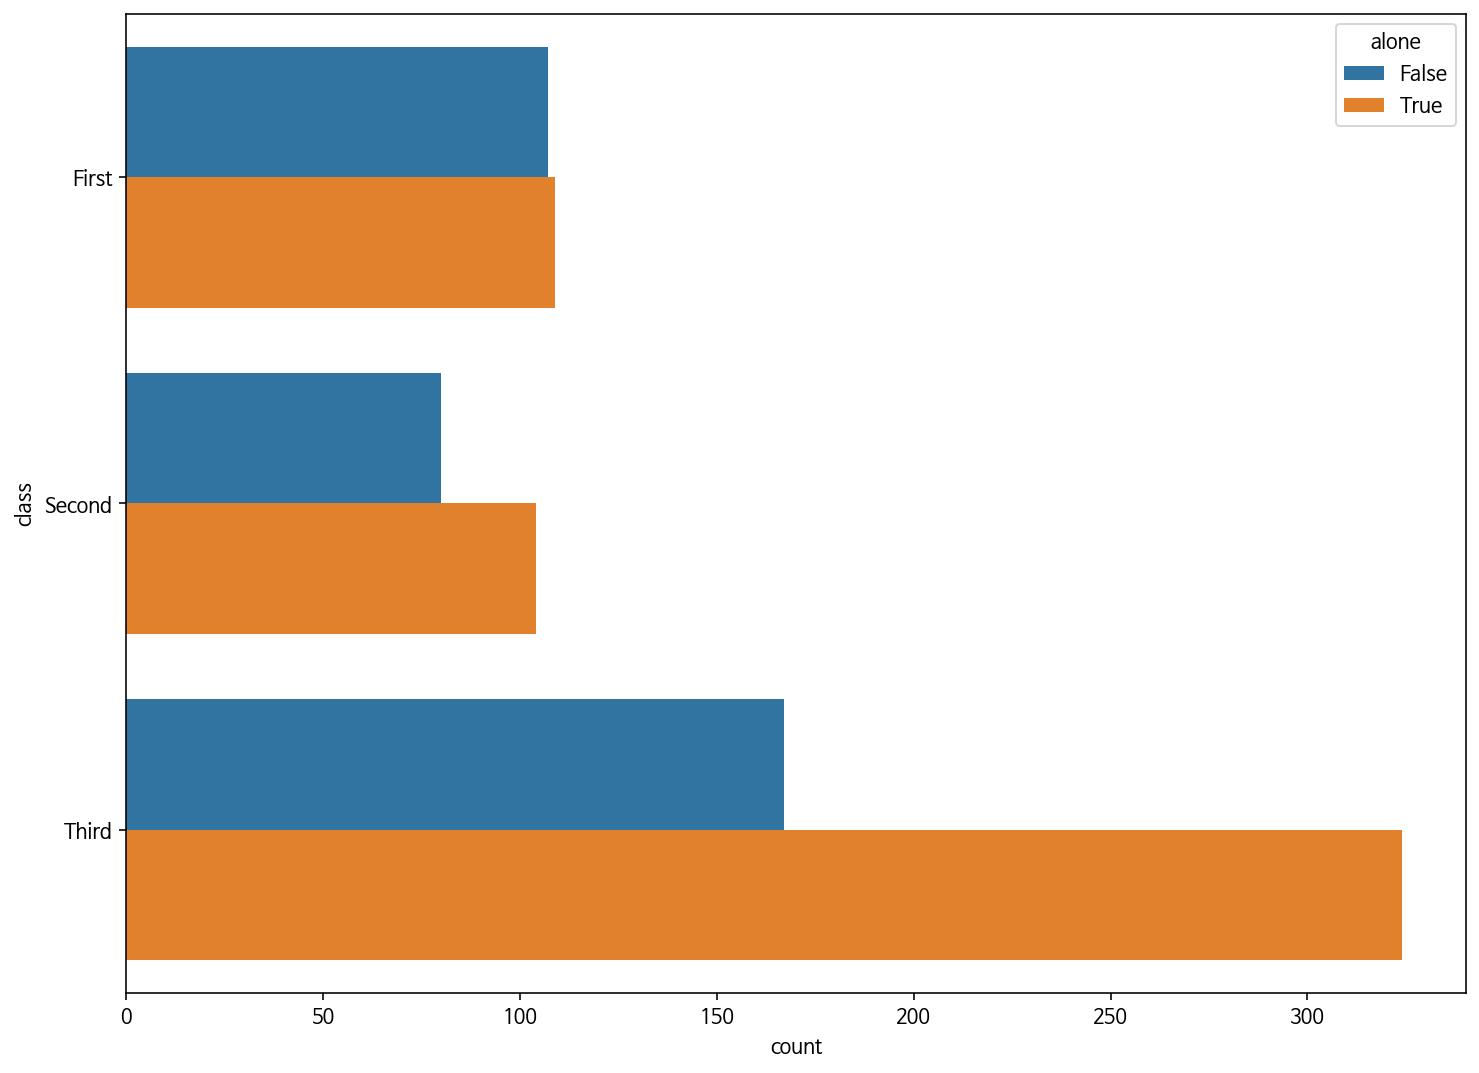

In [ ]:
sns.countplot(y="class", data=titanic, hue="alone")
plt.show()

# 2. displot
- matplotlib 의 hist+ kde를 통합한 그래프
- 데이터의 빈도(hist), 밀도(kde)를 동시에 확인할 수 있다.

In [ ]:
# 임의의 샘플 데이터 생성
N = 100000
x = np.random.randn(N) # 10만개의 정규분포를 이루는 랜덤값 생성

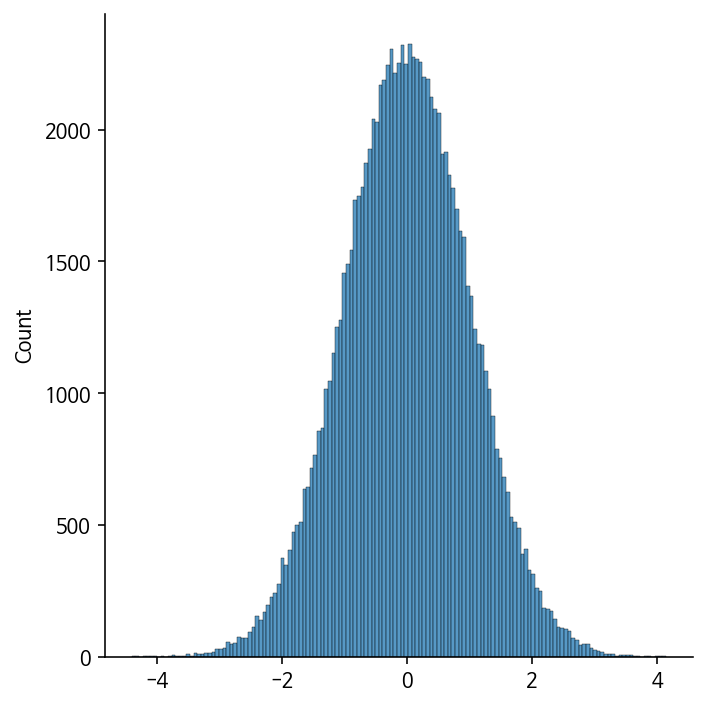

In [ ]:
sns.displot(x)
plt.show()

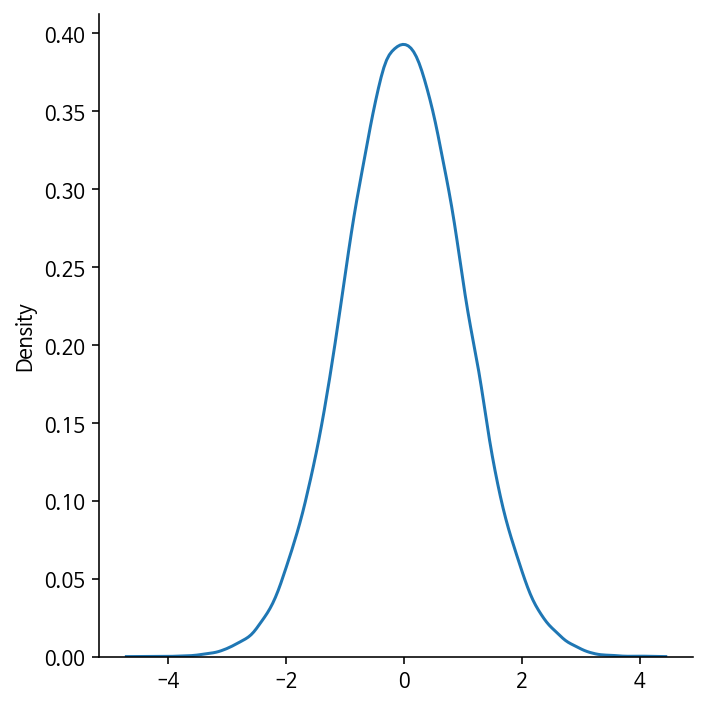

In [ ]:
sns.displot(x, kind="kde")
plt.show()

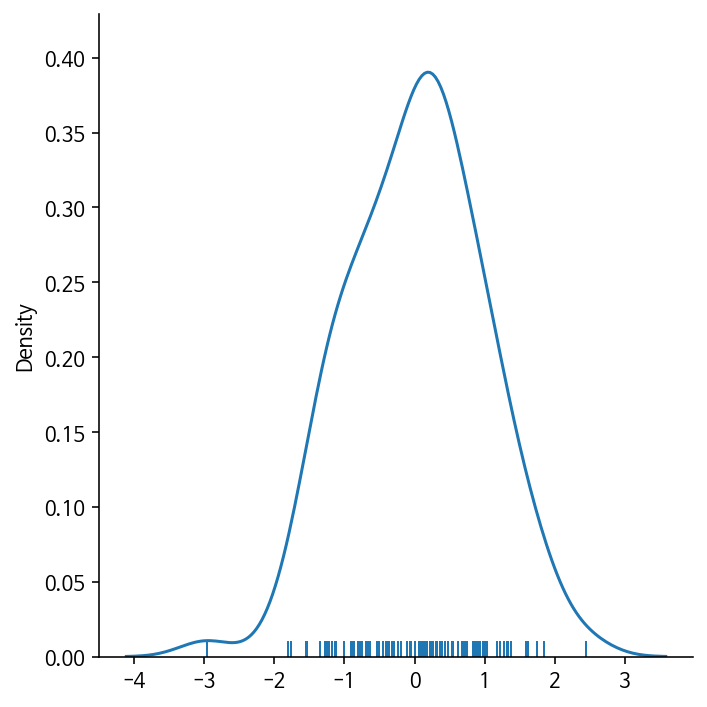

In [ ]:
sns.displot(np.random.randn(100), kind="kde", rug=True)

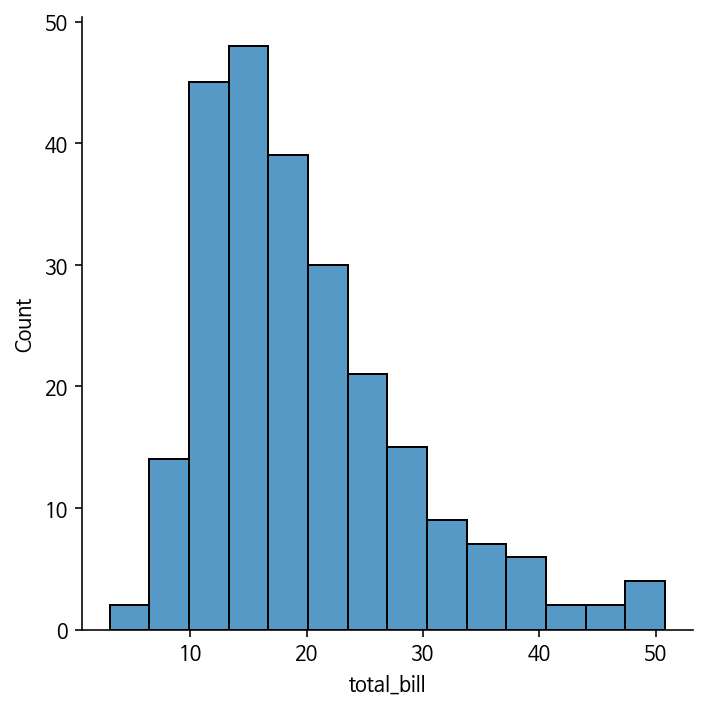

In [ ]:
sns.displot(tips['total_bill'])
plt.show()

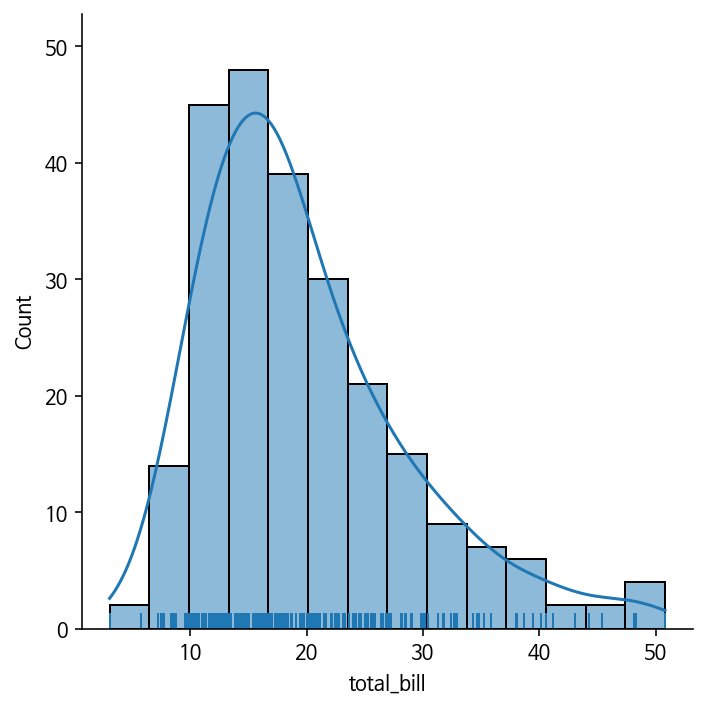

In [ ]:
sns.displot(tips['total_bill'], kde = True, rug =True)
plt.show()

# 3. Heatmap
- 데이터의 크기를 색상의 농도로 표현
- ***2차원 배열***의 데이터 필요⭐⭐

heatmap은 2차원 배열 데이터밖에 못들어감!! 그래서 밑의 예제도 피벗테이블 이용했음

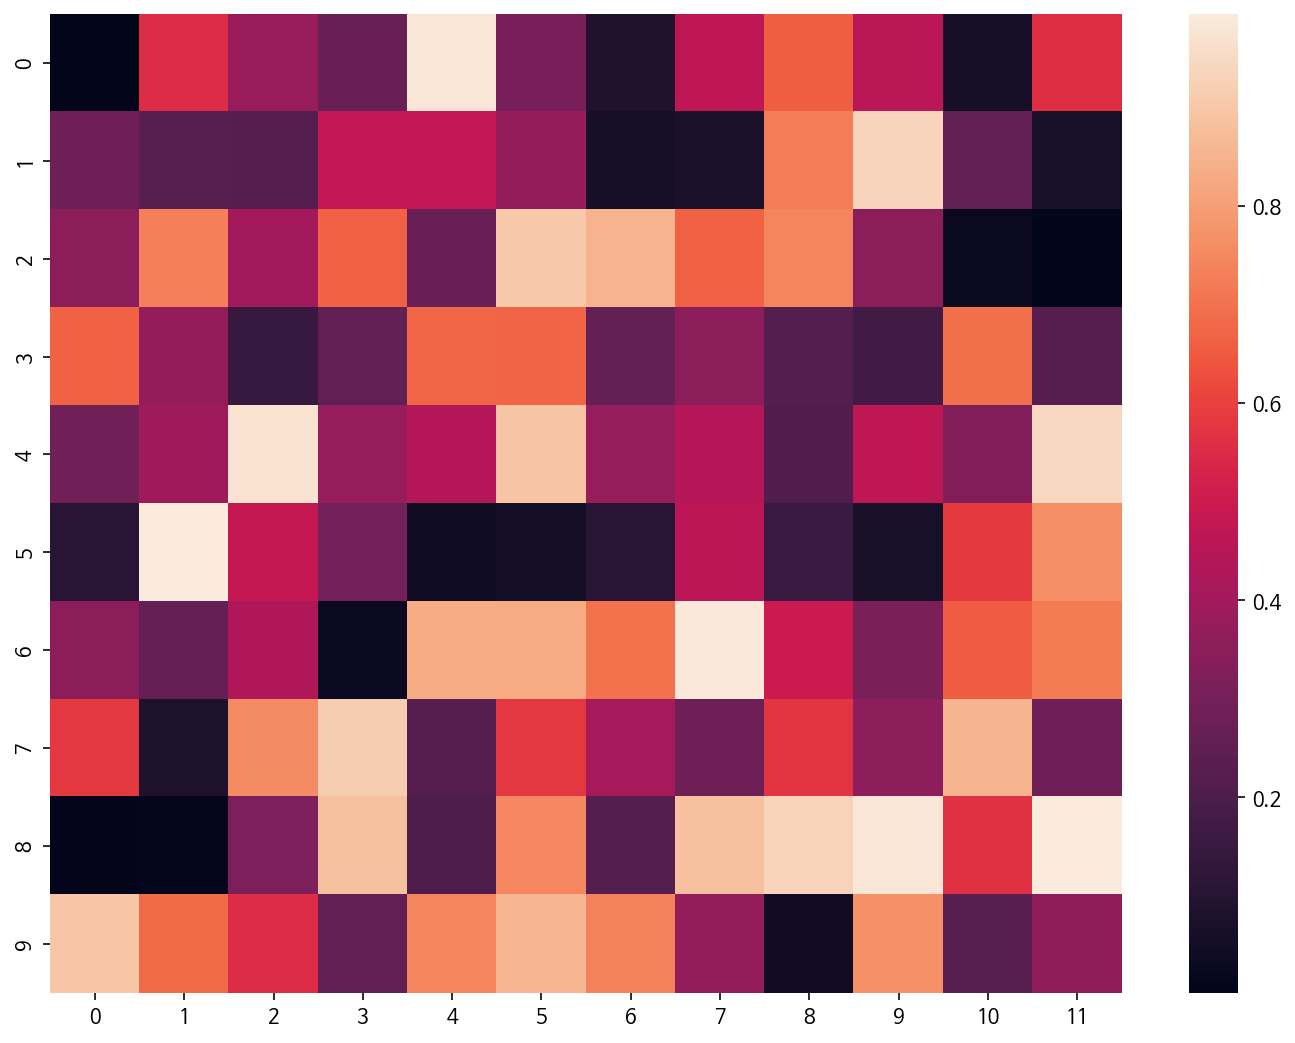

In [ ]:
x = np.random.rand(10,12)
sns.heatmap(x)

plt.show()

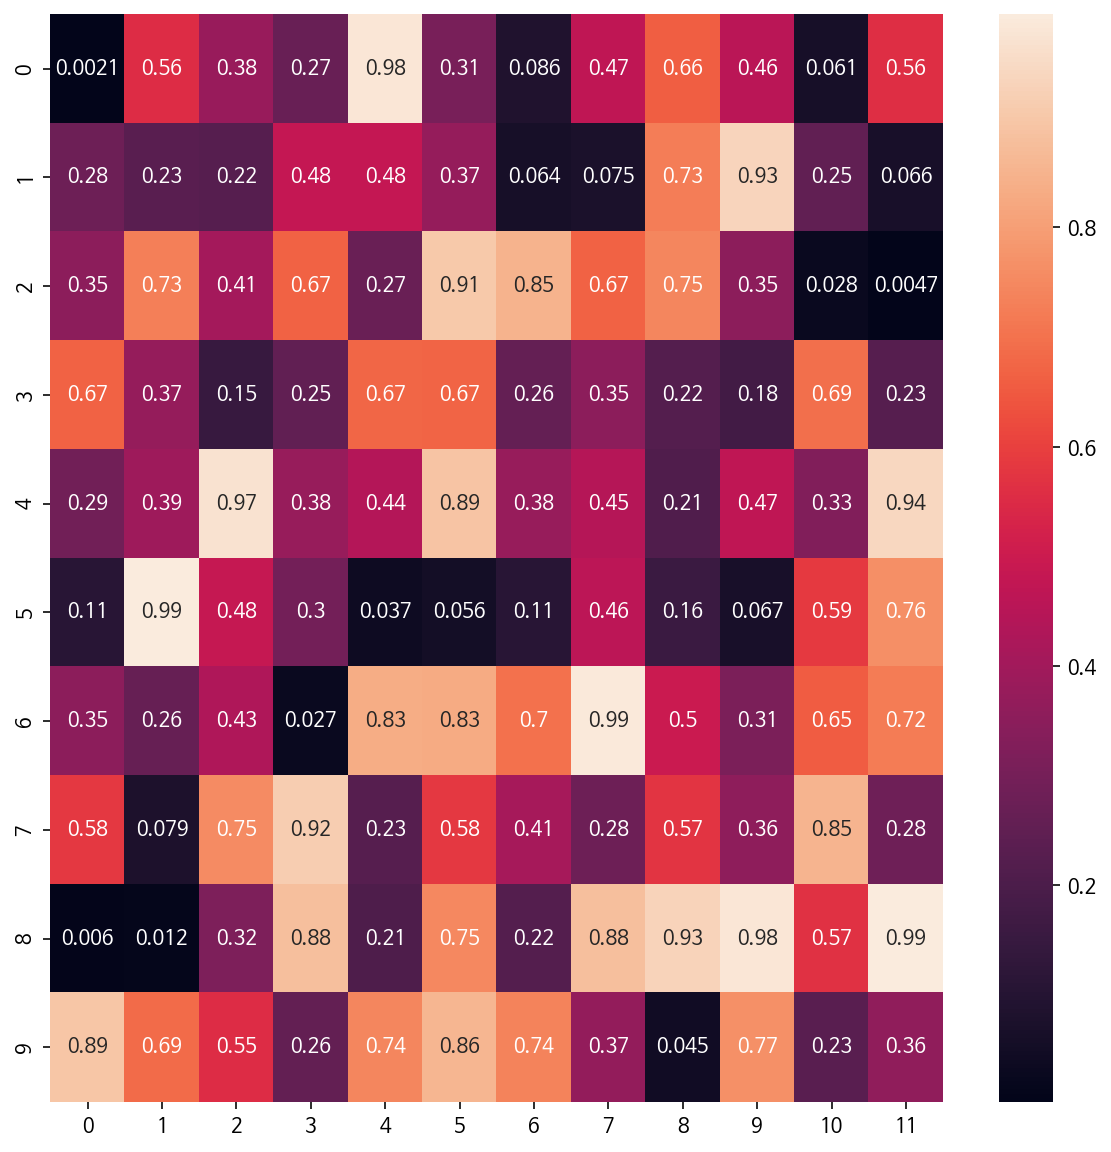

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(x, annot=True) # 네모위에 값 나타나게 하는거
plt.show()


In [ ]:
# tips 데이터 세트에서 요일 별 인원수 마다의 tip의 평균값을 히트맵으로 그려보기
import pandas as pd

df = pd.pivot_table(
    tips,
    index="day",
    columns= "size",
    values = "tip",
    aggfunc = [np.mean]
  )

df

mean                                             
size     1         2         3         4         5    6
day                                                    
Thur  1.83  2.442500  2.692500  4.218000  5.000000  5.3
Fri   1.92  2.644375  3.000000  4.730000       NaN  NaN
Sat   1.00  2.517547  3.797778  4.123846  3.000000  NaN
Sun    NaN  2.816923  3.120667  4.087778  4.046667  5.0

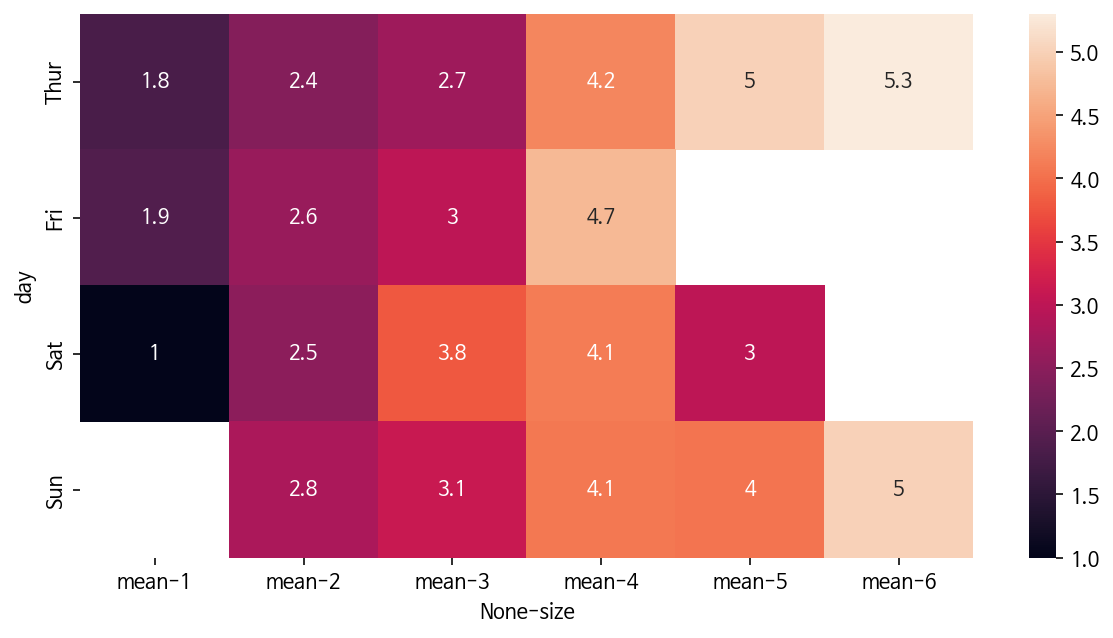

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df, annot=True)
plt.show()

# 4. pairplot
- gird의 형태로 각 데이터끼리의 조합에 대해 히스토그램, 분포도(scatter)를 그려준다.
  - 데이터들의 조합
    - tip과 total_bill의 관계
    - size와 total_bill의 관계
    - tip과 size의 관계

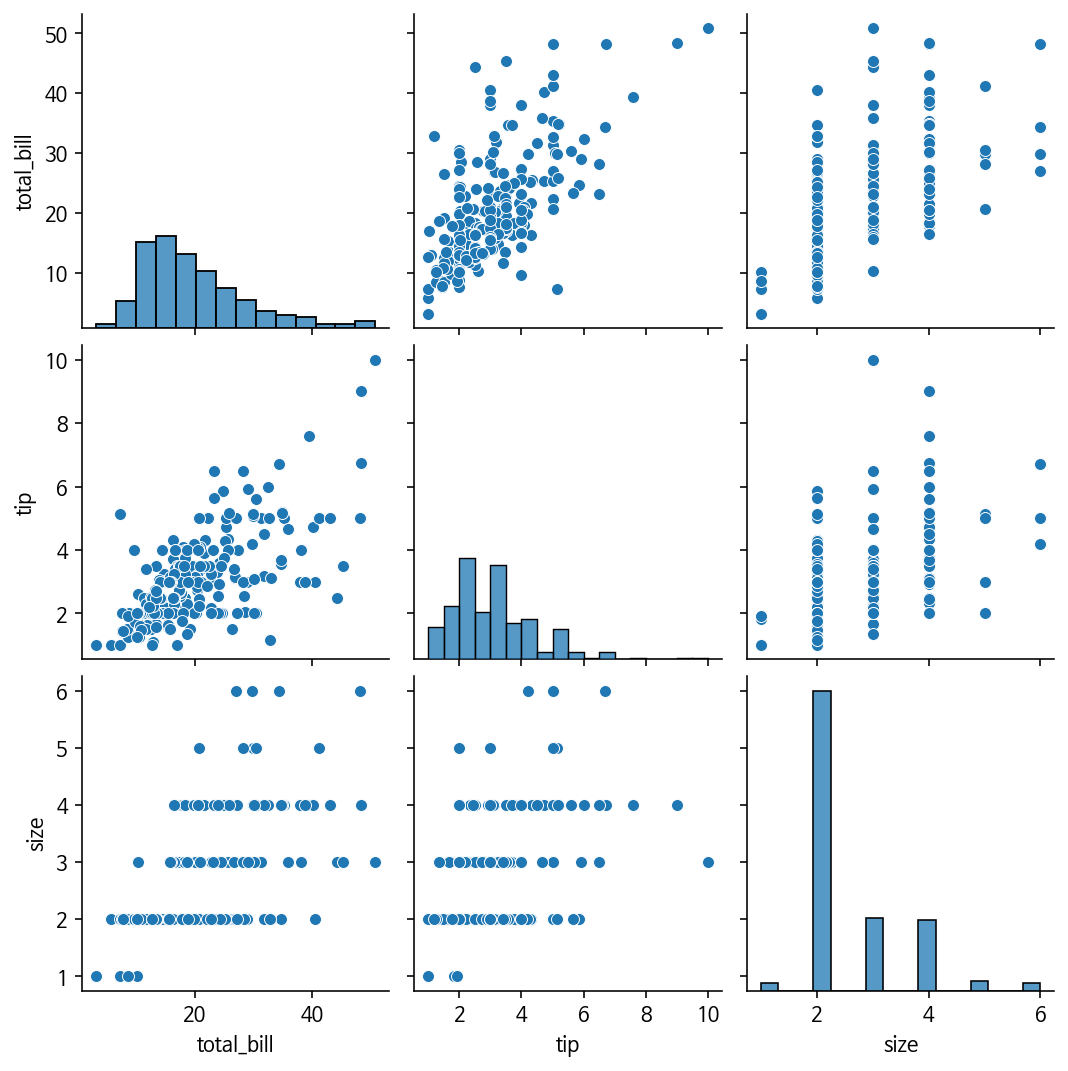

In [ ]:
# 수치형 데이터들만 나올꺼

sns.pairplot(tips)
plt.show()

# ↖방향으로 대칭이라 반대쪽부터 읽어줘도됨. s,t의관계나 t,s의 관계나 같음

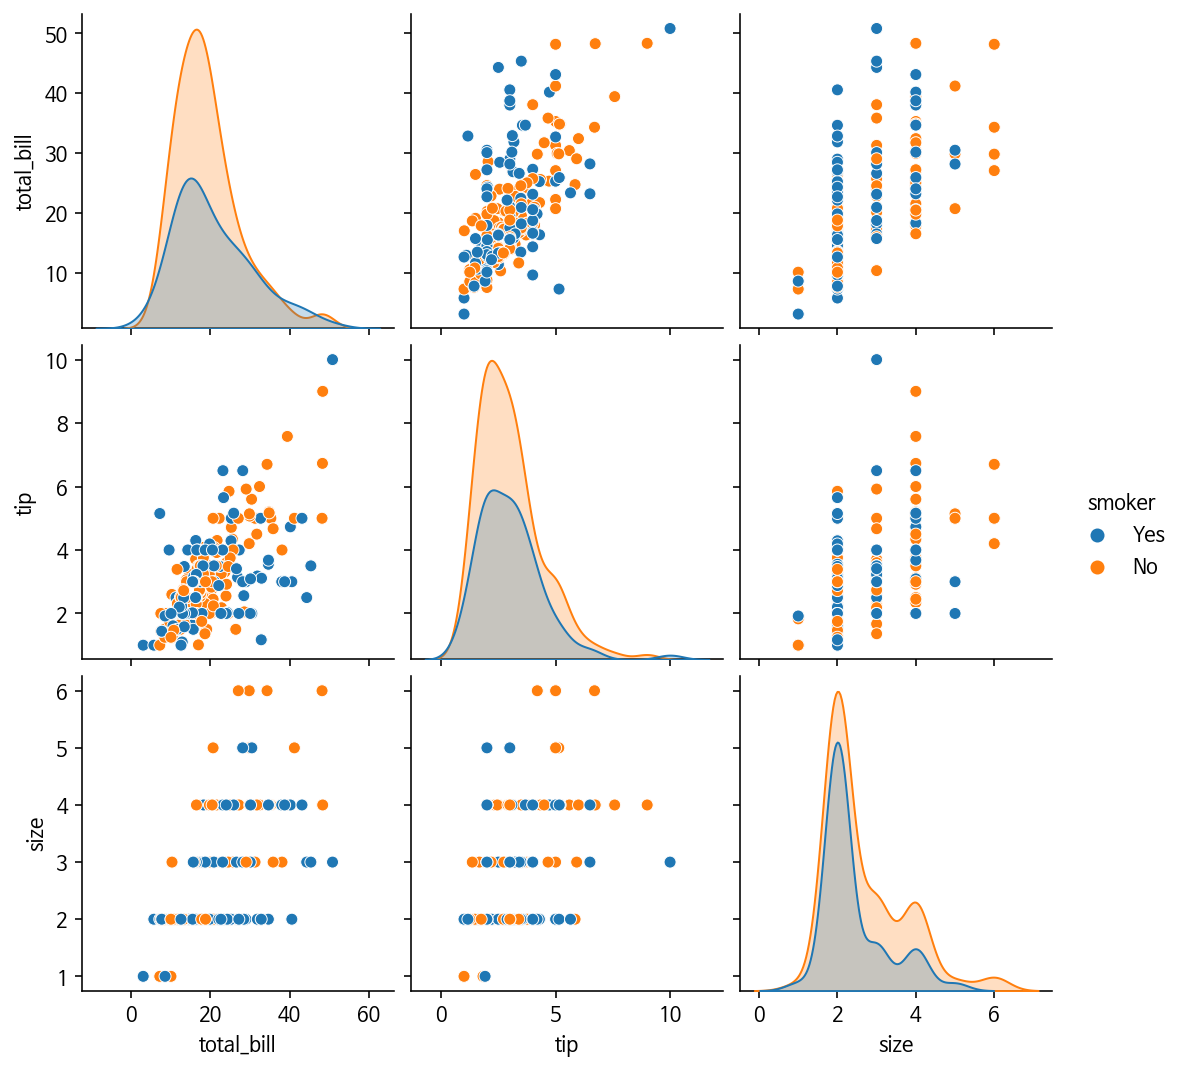

In [ ]:
sns.pairplot(tips, hue='smoker')
plt.show()

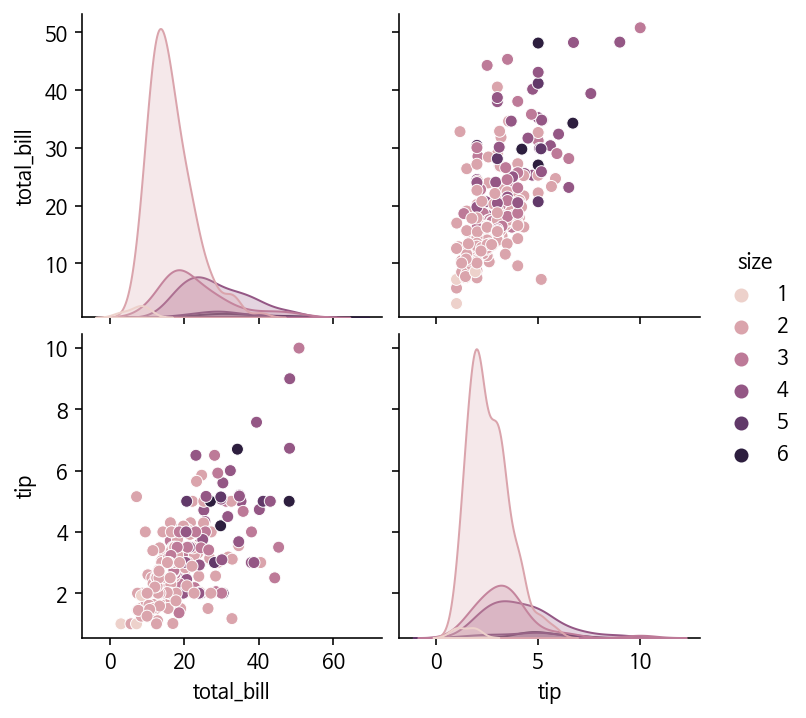

In [ ]:
sns.pairplot(tips, hue='size')
plt.show()

# 5. violinplot
- column에 대한 비교 빈도를 확인
- displot의 kde = True 옵션과 굉장히 흡사하지만 그래프가 대칭으로 되어있다.
- 곡선으로 되어있는 뚱뚱한 부분은 데이터의 분포
- 양쪽 끝 뾰족한 부분은 데이터의 최소와 최대를 나타낸다.

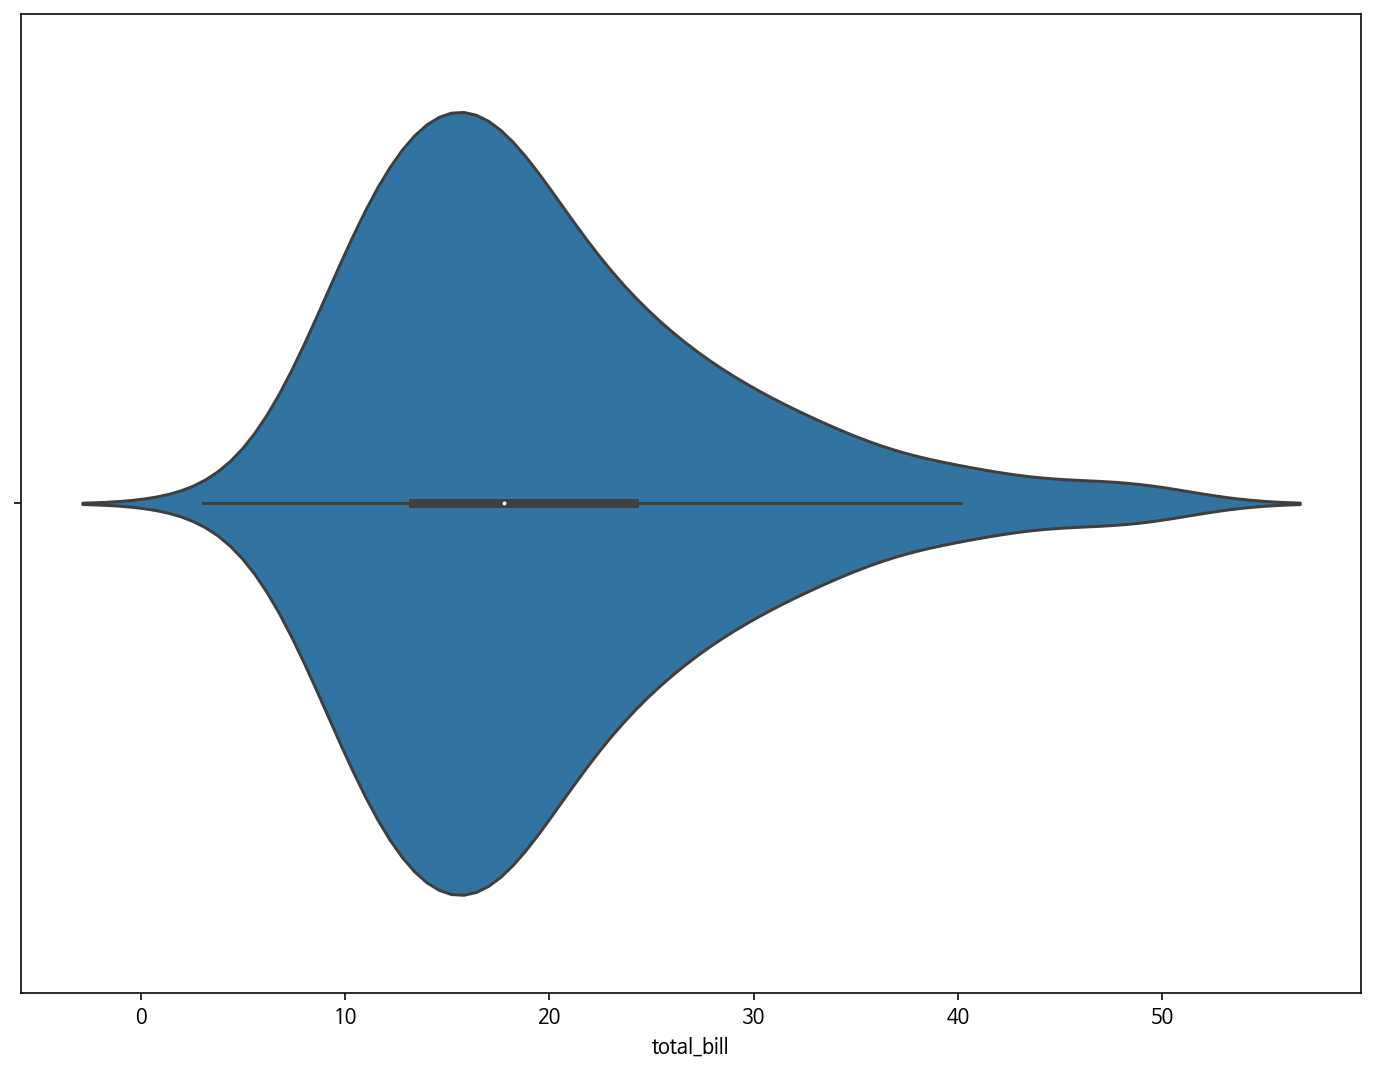

In [ ]:
sns.violinplot(x=tips['total_bill'])
plt.show()

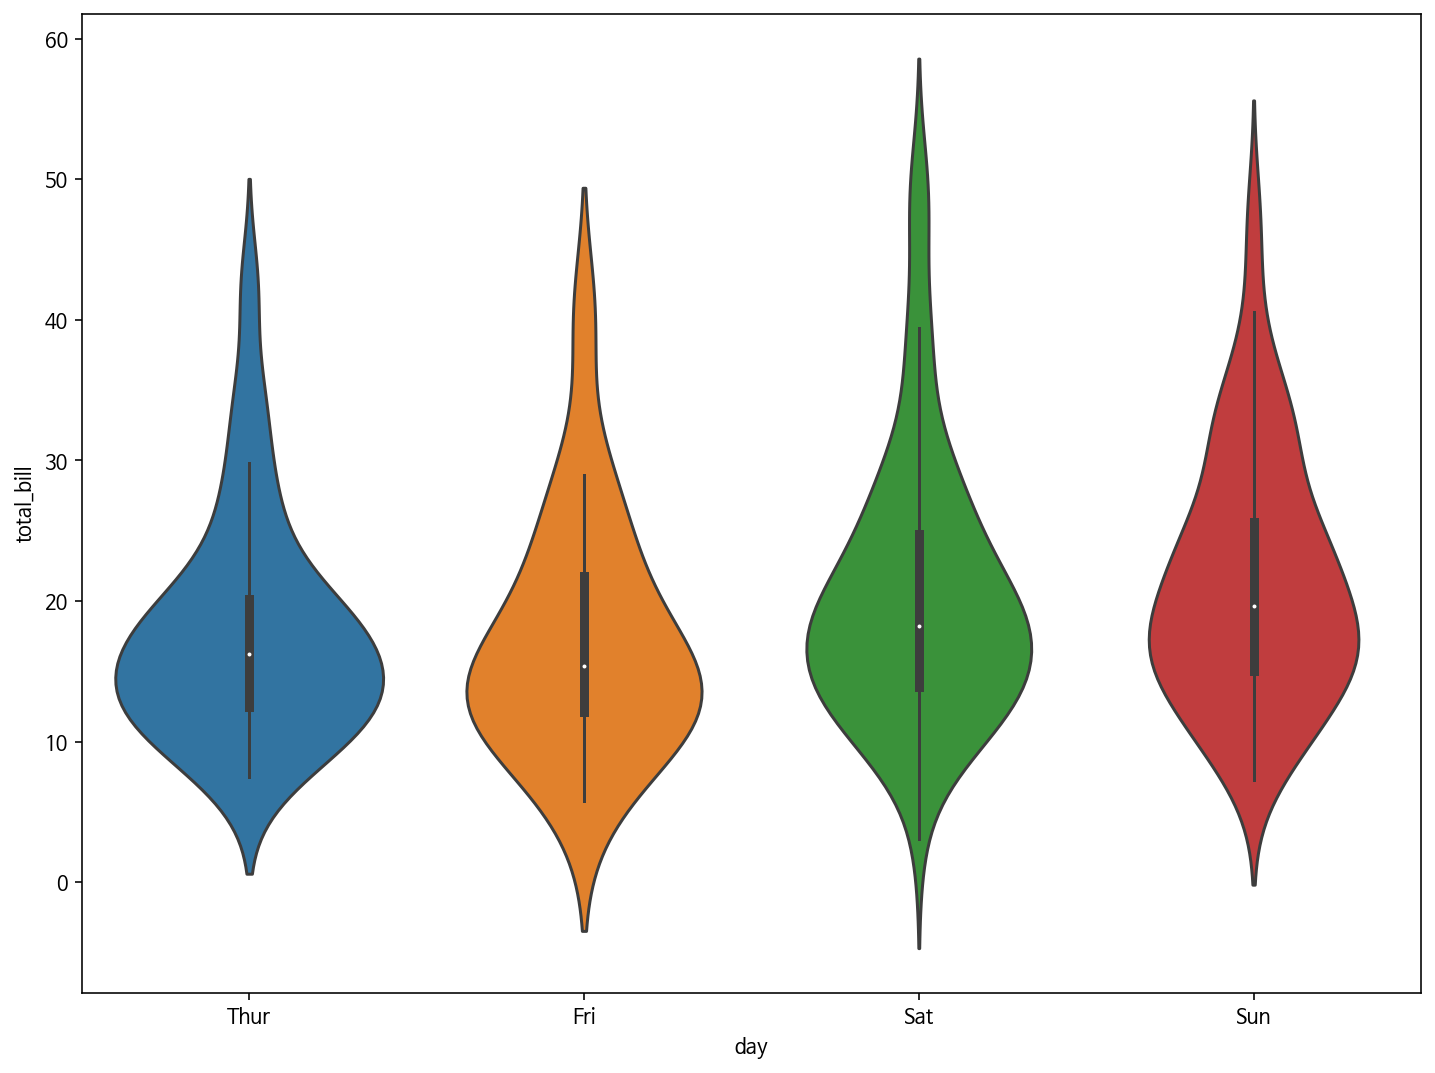

In [ ]:
# x, y축을 동시에 지정하여 바이올린
sns.violinplot(
    x = 'day',
    y ='total_bill',
    data=tips
)

plt.show()

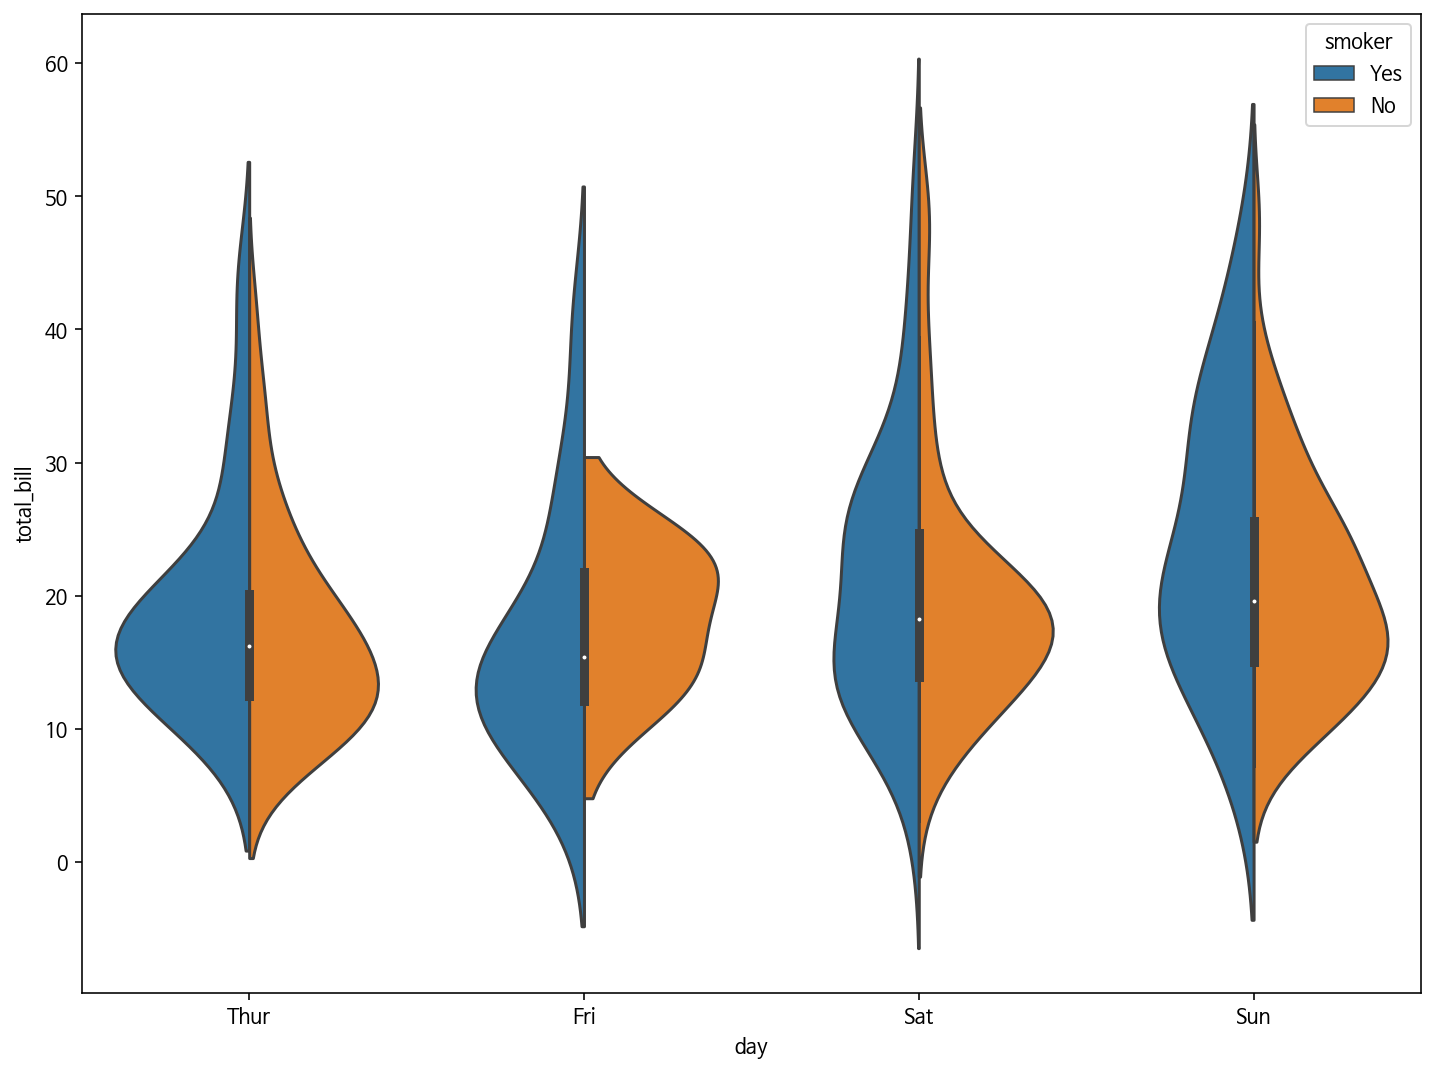

In [ ]:
sns.violinplot(
    x = 'day',
    y ='total_bill',
    data = tips,
    hue = 'smoker',
    split=True # hue 옵션으로 분할된 바이올린 플롯을 각각 합쳐준다.
)

plt.show()

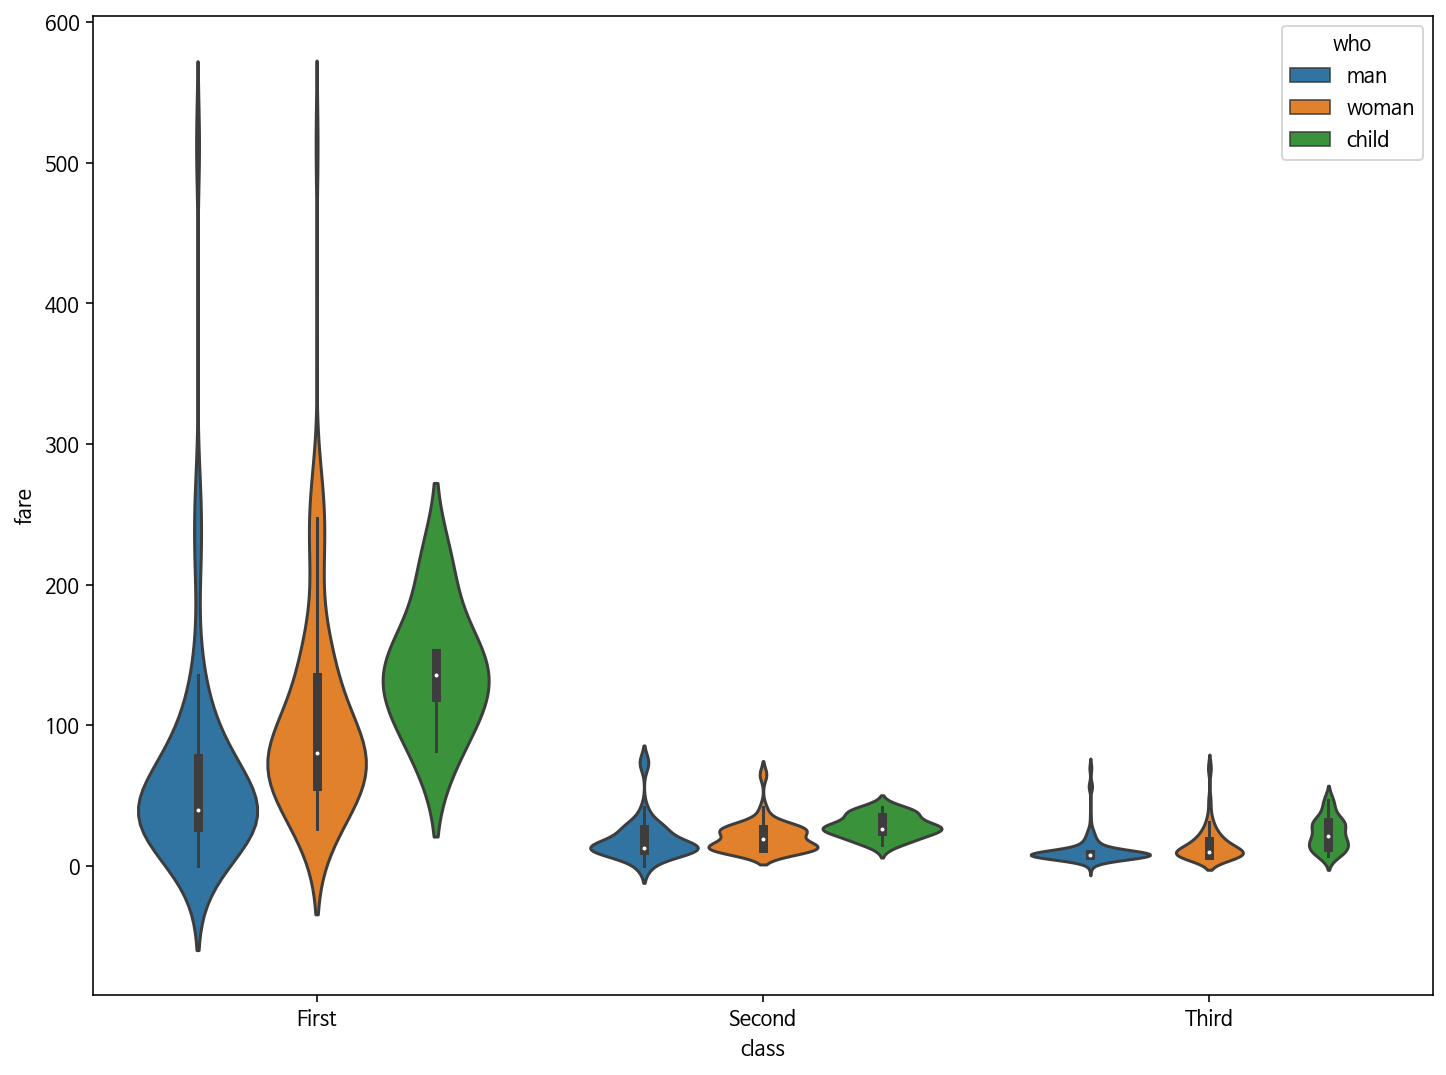

In [ ]:
# 스모커는 펴 안펴 2개니까 바이올린 문제없는데 3개면?

sns.violinplot(
    x = 'class',
    y ='fare',
    data = titanic,
    hue = 'who',
)
#  이건 split=Ture 불가능!! 오류남

# 6.lmplot 엘엠플랏
  - 컬럼간의 선형관계를 확인하기에 용이하다.

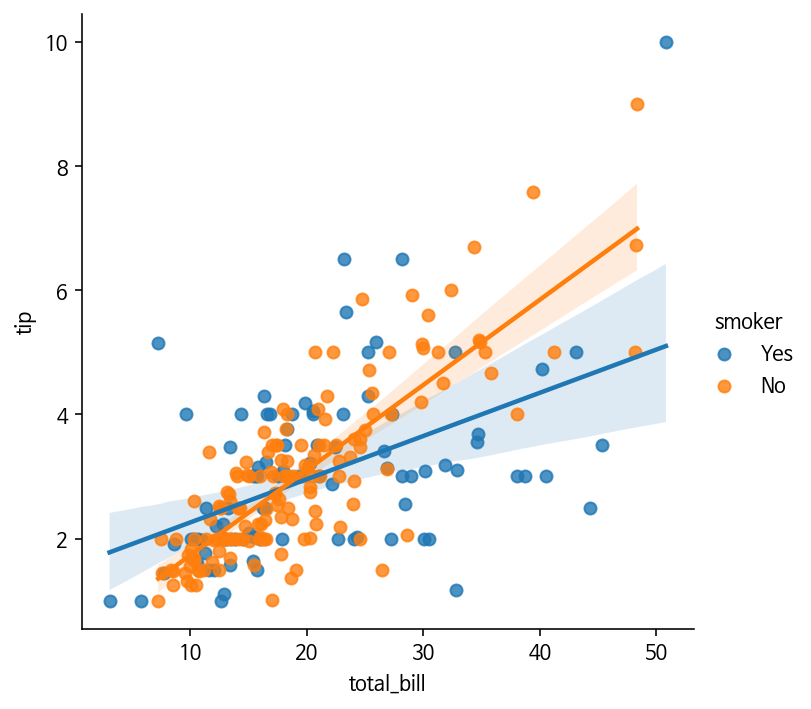

In [ ]:
sns.lmplot(x='total_bill',y='tip', data=tips, hue='smoker')
plt.show()

# 선형관계까지 그려줌!

# 7. relplot
- 두 데이터간의 산포도를 그려준다.
- scatter와 동일한 역할

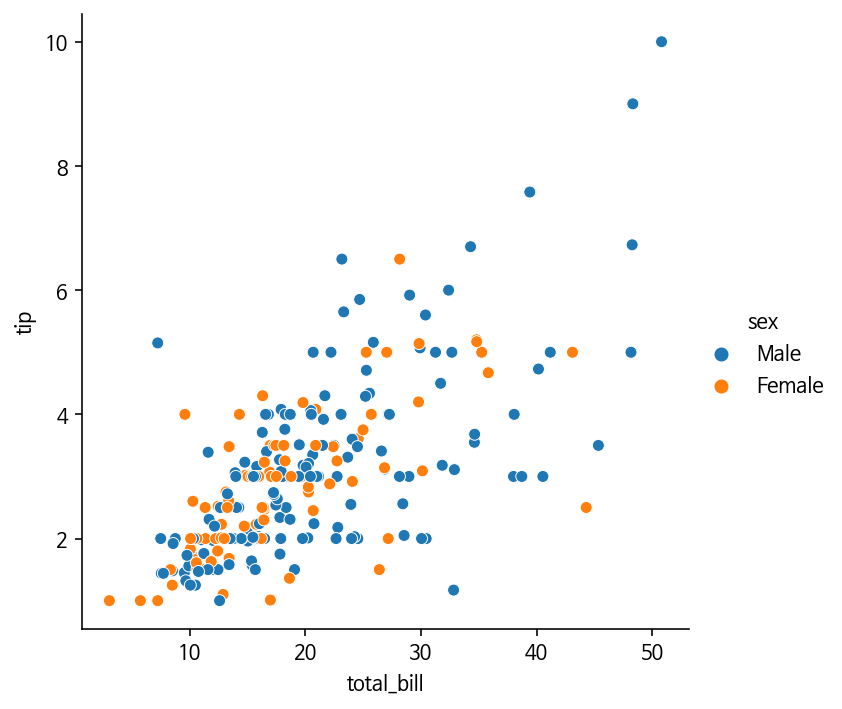

In [ ]:
sns.relplot(
    x='total_bill',
    y='tip',
    data=tips,
    hue='sex'
)

plt.show()

In [ ]:
# 브랜드별 평균 가격구하고 시각화
#   - 히트맵, barplot
#   - barplot을 이용해서 그릴 때는 가격 평균 내림차순 정렬 후 시각화
#   - 히트맵 그릴 때는 브랜드별 평균가격과 별점수 총합 시각화

In [ ]:
!pip install fake_useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=c61503b8b5784d94263118e055442f436032224e230dbd66664aaee4d8cd62bd
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [ ]:
from fake_useragent import UserAgent
import requests
from bs4 import BeautifulSoup

url = "https://www.musinsa.com/categories/item/001004"
headers = {
    "user-agent": UserAgent().chrome
  
}

response = requests.get(url, headers=headers)
page = response.content
soup = BeautifulSoup(page, 'html.parser') # dom화시키기

response

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


<Response [200]>

In [ ]:

fin_list = soup.select("#searchList > .li_box")

title_list = []
goods_link_list = []
img_src_list = []
price_list = []
stars_list = []
brand_list = []

for fin in fin_list:
  title = fin.select_one(".list_info").text.strip().split("\n")[-1]
  goods_link = fin.select_one(".img-block").get("href")
  img_src = fin.select_one("img.lazyload.lazy")['data-original']
  brand = fin.select_one(".item_title > a").text

  if fin.select_one(".price").select_one("del") == True:
    pass
  else:
    price = fin.select_one(".price").text.split()[-1]

  stars = fin.select_one(".count").text


  title_list.append(title)
  goods_link_list.append(goods_link)
  img_src_list.append(img_src)
  price_list.append(price)
  stars_list.append(stars)
  brand_list.append(brand)

import pandas as pd
result = pd.DataFrame({
    "이름": title_list,
    "브랜드": brand_list,
    "상품주소" :goods_link_list,
    "이미지주소": img_src_list,
    "가격": price_list,
    "별점" : stars_list
})

result

,이름,브랜드,상품주소,이미지주소,가격,별점
0,(22FW) 2 TONE ARCH HOODIE GRAY,예일,//www.musinsa.com/app/goods/2326935,//image.msscdn.net/images/goods_img/20220125/2...,"67,150원","4,095"
1,UNISEX LAUREL OVERSIZED HOODIE B...,어반드레스,//www.musinsa.com/app/goods/1211169,//image.msscdn.net/images/goods_img/20191103/1...,"48,300원","3,135"
2,슬레이크 후드 네이비 HHHD3397,티떠블유엔,//www.musinsa.com/app/goods/2106707,//image.msscdn.net/images/goods_img/20210902/2...,"39,800원","4,031"
3,에센셜 후드 스웻 셔츠 (MELANGE GREY),토피,//www.musinsa.com/app/goods/2314616,//image.msscdn.net/images/goods_img/20220119/2...,"39,000원","2,687"
4,슬레이크 후드 올리브 HHHD3397,티떠블유엔,//www.musinsa.com/app/goods/2106705,//image.msscdn.net/images/goods_img/20210902/2...,"39,800원","2,183"
...,...,...,...,...,...,...
85,유에스에이 바스켓볼 후드티 블랙,크림소다랩,//www.musinsa.com/app/goods/2827221,//image.msscdn.net/images/goods_img/20220929/2...,"46,900원",71
86,T-Logo Hoodie Navy,디스이즈네버댓,//www.musinsa.com/app/goods/2758347,//image.msscdn.net/images/goods_img/20220831/2...,"95,000원",168
87,[유정 PICK] 로럴골든 후드티_멜란지그레이,게인스보로,//www.musinsa.com/app/goods/2149325,//image.msscdn.net/images/goods_img/20210928/2...,"49,500원",141
88,World Flower Hoodie [Black],로제프란츠,//www.musinsa.com/app/goods/2247224,//image.msscdn.net/images/goods_img/20211125/2...,"42,500원",230


In [ ]:
# 브랜드별 평균 가격구하고 시각화
#   - 히트맵, barplot
#   - barplot을 이용해서 그릴 때는 가격 평균 내림차순 정렬 후 시각화
#   - 히트맵 그릴 때는 브랜드별 평균가격과 별점수 총합 시각화


# 가격 정수로 바꾸기
pr_list = []

for pr in result["가격"].ravel():
  pr2 = int("".join(pr[:-1].split(",")))
  pr_list.append(pr2)

result["가격"] = pr_list


result


,이름,브랜드,상품주소,이미지주소,가격,별점
0,(22FW) 2 TONE ARCH HOODIE GRAY,예일,//www.musinsa.com/app/goods/2326935,//image.msscdn.net/images/goods_img/20220125/2...,67150,"4,095"
1,UNISEX LAUREL OVERSIZED HOODIE B...,어반드레스,//www.musinsa.com/app/goods/1211169,//image.msscdn.net/images/goods_img/20191103/1...,48300,"3,135"
2,슬레이크 후드 네이비 HHHD3397,티떠블유엔,//www.musinsa.com/app/goods/2106707,//image.msscdn.net/images/goods_img/20210902/2...,39800,"4,031"
3,에센셜 후드 스웻 셔츠 (MELANGE GREY),토피,//www.musinsa.com/app/goods/2314616,//image.msscdn.net/images/goods_img/20220119/2...,39000,"2,687"
4,슬레이크 후드 올리브 HHHD3397,티떠블유엔,//www.musinsa.com/app/goods/2106705,//image.msscdn.net/images/goods_img/20210902/2...,39800,"2,183"
...,...,...,...,...,...,...
85,유에스에이 바스켓볼 후드티 블랙,크림소다랩,//www.musinsa.com/app/goods/2827221,//image.msscdn.net/images/goods_img/20220929/2...,46900,71
86,T-Logo Hoodie Navy,디스이즈네버댓,//www.musinsa.com/app/goods/2758347,//image.msscdn.net/images/goods_img/20220831/2...,95000,168
87,[유정 PICK] 로럴골든 후드티_멜란지그레이,게인스보로,//www.musinsa.com/app/goods/2149325,//image.msscdn.net/images/goods_img/20210928/2...,49500,141
88,World Flower Hoodie [Black],로제프란츠,//www.musinsa.com/app/goods/2247224,//image.msscdn.net/images/goods_img/20211125/2...,42500,230


In [ ]:
# 별점 정수로 바꾸기

ar_list = []

for ar in result["별점"].ravel():
  if len(ar) >= 4:
    ar2 = int("".join(ar.split(",")))

  else:
    ar2 = int(ar)

  ar_list.append(ar2)

result["별점"] = ar_list

result


# df['상품가격'] = df['상품가격'].apply(lambda x : x.replace(",", "").replace("원", "")).astype(int)
# df['상품별점등록수'] = df['상품별점등록수'].apply(lambda x : x.replace(",", "")).astype(int)
#⭐⭐⭐ replace, apply 복습



,이름,브랜드,상품주소,이미지주소,가격,별점
0,(22FW) 2 TONE ARCH HOODIE GRAY,예일,//www.musinsa.com/app/goods/2326935,//image.msscdn.net/images/goods_img/20220125/2...,67150,4095
1,UNISEX LAUREL OVERSIZED HOODIE B...,어반드레스,//www.musinsa.com/app/goods/1211169,//image.msscdn.net/images/goods_img/20191103/1...,48300,3135
2,슬레이크 후드 네이비 HHHD3397,티떠블유엔,//www.musinsa.com/app/goods/2106707,//image.msscdn.net/images/goods_img/20210902/2...,39800,4031
3,에센셜 후드 스웻 셔츠 (MELANGE GREY),토피,//www.musinsa.com/app/goods/2314616,//image.msscdn.net/images/goods_img/20220119/2...,39000,2687
4,슬레이크 후드 올리브 HHHD3397,티떠블유엔,//www.musinsa.com/app/goods/2106705,//image.msscdn.net/images/goods_img/20210902/2...,39800,2183
...,...,...,...,...,...,...
85,유에스에이 바스켓볼 후드티 블랙,크림소다랩,//www.musinsa.com/app/goods/2827221,//image.msscdn.net/images/goods_img/20220929/2...,46900,71
86,T-Logo Hoodie Navy,디스이즈네버댓,//www.musinsa.com/app/goods/2758347,//image.msscdn.net/images/goods_img/20220831/2...,95000,168
87,[유정 PICK] 로럴골든 후드티_멜란지그레이,게인스보로,//www.musinsa.com/app/goods/2149325,//image.msscdn.net/images/goods_img/20210928/2...,49500,141
88,World Flower Hoodie [Black],로제프란츠,//www.musinsa.com/app/goods/2247224,//image.msscdn.net/images/goods_img/20211125/2...,42500,230


In [ ]:
dd = result.groupby("브랜드")[["가격"]].mean().sort_values(by="가격", ascending= False)
kk = dd.reset_index()
kk

# [[]] 두번안하고 to_frame  쳐도 이쁘게 볼 수 있음

,브랜드,가격
0,디스이즈네버댓,93500.000000
1,잇자바이브,89000.000000
2,노매뉴얼,87000.000000
3,인템포무드,73900.000000
4,엠엠엘지,73800.000000
5,커버낫,71100.000000
6,코드그라피,69900.000000
7,비바스튜디오,69800.000000
8,예일,69564.285714
9,그루브라임,69000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


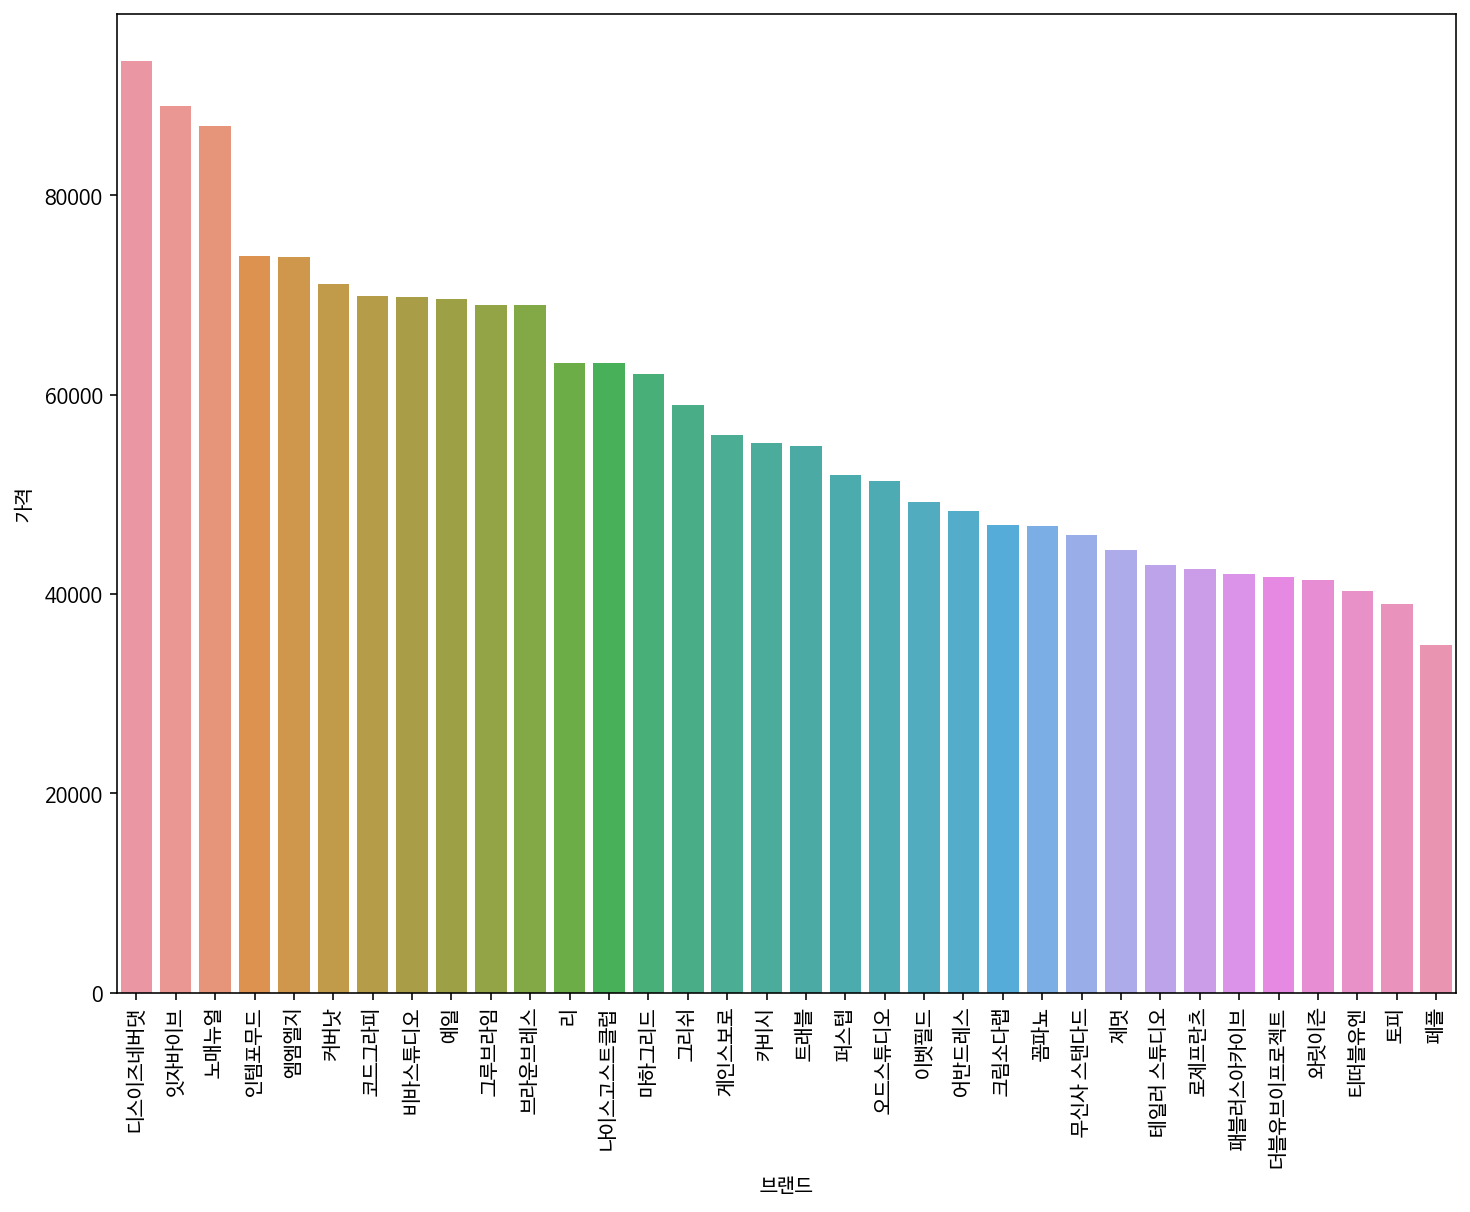

In [ ]:
sns.barplot(kk["브랜드"] ,kk["가격"], data = dd)
plt.xticks(rotation=90)

plt.show()

# 1번문제답

In [ ]:
mm = result.groupby("브랜드")[["별점"]].sum()
mm
pp = pd.concat([dd,mm], axis=1)
pp

# [[]] 두번안하고 to_frame  쳐도 이쁘게 볼 수 있음

,가격,별점
브랜드,,
디스이즈네버댓,93500.000000,1365
잇자바이브,89000.000000,35
노매뉴얼,87000.000000,2869
인템포무드,73900.000000,3578
엠엠엘지,73800.000000,15654
커버낫,71100.000000,5826
코드그라피,69900.000000,10031
비바스튜디오,69800.000000,522
예일,69564.285714,16645


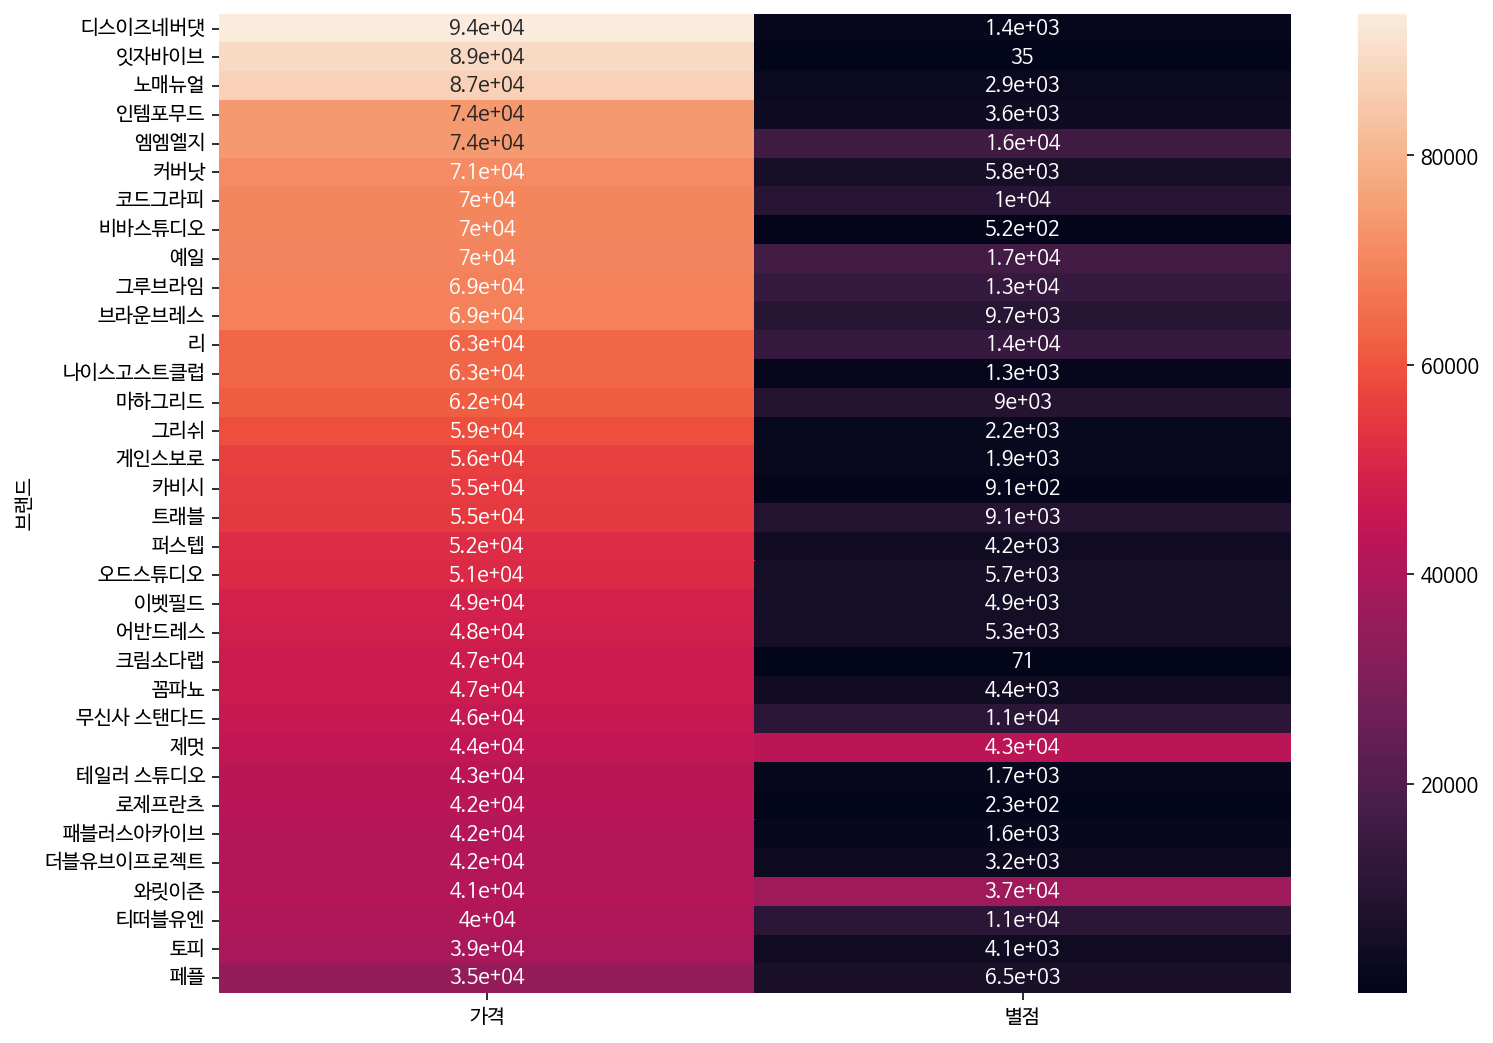

In [ ]:
sns.heatmap(pp, annot=True)
plt.show()

# 2번문제답